# Displays the Frequent Colors Found
### Uses:
- Display the colors found in legend and cells

Top 6 most frequent colors (excluding black) and their counts:
Color: [255 255 255], Count: 841107
Color: [117 221 255], Count: 278636
Color: [ 87 165 215], Count: 22253
Color: [ 58 110 175], Count: 7731
Color: [ 29  55 135], Count: 4172
Color: [ 0  0 96], Count: 4159


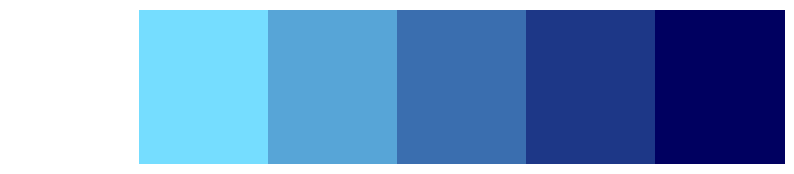

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

# Specify the directory you want to use
image_path = 'D:\\encoder-tool\\generated-heatmaps\\Industrial_design_applications__nonresident__by_count.png'

# Replace with your image path relative to the specific directory
image = Image.open(image_path)
image = image.convert('RGB')  # Ensure image is in RGB format
image_array = np.array(image)

# Reshape the array to a 2D array where each row is a color
pixels = image_array.reshape(-1, image_array.shape[-1])

# Find unique colors and their counts
unique_colors, counts = np.unique(pixels, axis=0, return_counts=True)

# Filter out black color
non_black_indices = np.any(unique_colors != [0, 0, 0], axis=1)
unique_colors = unique_colors[non_black_indices]
counts = counts[non_black_indices]

# Sort the unique colors by their counts in descending order
sorted_indices = np.argsort(-counts)
top_colors = unique_colors[sorted_indices][:6]
top_counts = counts[sorted_indices][:6]

# Display the top 6 most frequent colors and their counts
print("Top 6 most frequent colors (excluding black) and their counts:")
for color, count in zip(top_colors, top_counts):
    print(f"Color: {color}, Count: {count}")

# Optionally, display the top 6 most frequent colors
plt.figure(figsize=(10, 2))
plt.imshow([top_colors], aspect='auto')
plt.axis('off')
plt.show()

## Contour Detection for Grid heatmap cells region

In [11]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\thesis-tool\\generated-heatmaps'
output_dir = 'D:\\thesis-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")
            cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box in green

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 454, y: 118, width: 568, height: 795
Removing specific size contour at x: 1137, y: 374, width: 26, height: 154
Removing specific size contour at x: 454, y: 118, width: 568, height: 795
Drawing bounding box for largest contour at x: 454, y: 118, width: 568, height: 795
Removing specific size contour at x: 1125, y: 386, width: 27, height: 129
Removing specific size contour at x: 454, y: 118, width: 568, height: 795


KeyboardInterrupt: 

## Removing the Detected Regions

### Uses:
- Removes the graphical content such as the grid cells and color legend to cleanly extract the text in the grid heatmap cells

In [11]:
import cv2
import numpy as np
import os

# Directories
input_dir = 'D:\\encoder-tool\\generated-heatmaps'
output_dir = 'D:\\encoder-tool\\filtered-contours'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the specific size range for contours (area in pixels)
min_contour_area = 400  # Minimum contour area
max_contour_area = 2000  # Maximum contour area

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Resize the image to a smaller size
        scale_percent = 100  # Percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

        # Convert to grayscale
        gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Apply binary thresholding
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

        # Find contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Measure contour areas and find the largest one
        max_area = 0
        largest_contour = None
        specific_size_contours = []

        for contour in contours:
            area = cv2.contourArea(contour)
            
            if area > max_area:
                max_area = area
                largest_contour = contour
            if 1000 < area < 10000:
                specific_size_contours.append(contour)
        
        specific_size_contours.append(largest_contour)

        # Draw bounding box around the largest contour
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            print(f"Drawing bounding box for largest contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Remove contours of specific size by filling them with white color
        for contour in specific_size_contours:
            cv2.drawContours(resized_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
            x, y, w, h = cv2.boundingRect(contour)
            print(f"Removing specific size contour at x: {x}, y: {y}, width: {w}, height: {h}")

        # Save the result to a file in the output directory
        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, resized_image)

        # Display the result with the bounding box (optional)
        # cv2.imshow('Contours with Bounding Boxes', resized_image)
        # cv2.waitKey(3000)  # Wait for 3 seconds
        # cv2.destroyAllWindows()

Drawing bounding box for largest contour at x: 405, y: 105, width: 568, height: 795
Removing specific size contour at x: 1102, y: 374, width: 26, height: 154
Removing specific size contour at x: 405, y: 105, width: 568, height: 795
Drawing bounding box for largest contour at x: 405, y: 131, width: 568, height: 795
Removing specific size contour at x: 1102, y: 374, width: 26, height: 154
Removing specific size contour at x: 405, y: 131, width: 568, height: 795
Drawing bounding box for largest contour at x: 504, y: 131, width: 568, height: 795
Removing specific size contour at x: 1202, y: 374, width: 27, height: 154
Removing specific size contour at x: 504, y: 131, width: 568, height: 795
Drawing bounding box for largest contour at x: 405, y: 131, width: 568, height: 795
Removing specific size contour at x: 1102, y: 374, width: 26, height: 154
Removing specific size contour at x: 405, y: 131, width: 568, height: 795
Drawing bounding box for largest contour at x: 405, y: 131, width: 568, 

## Extracting Y-Axis Label from the Removed Contour Images
#### Uses:
- Extracts the texts from the region of interest
- `Note: The varying position of images sometimes include the labels in x-axis, see the instances below`

#### Next step:
- Remove integers extracted from the region of interest to include only the countries or the strings

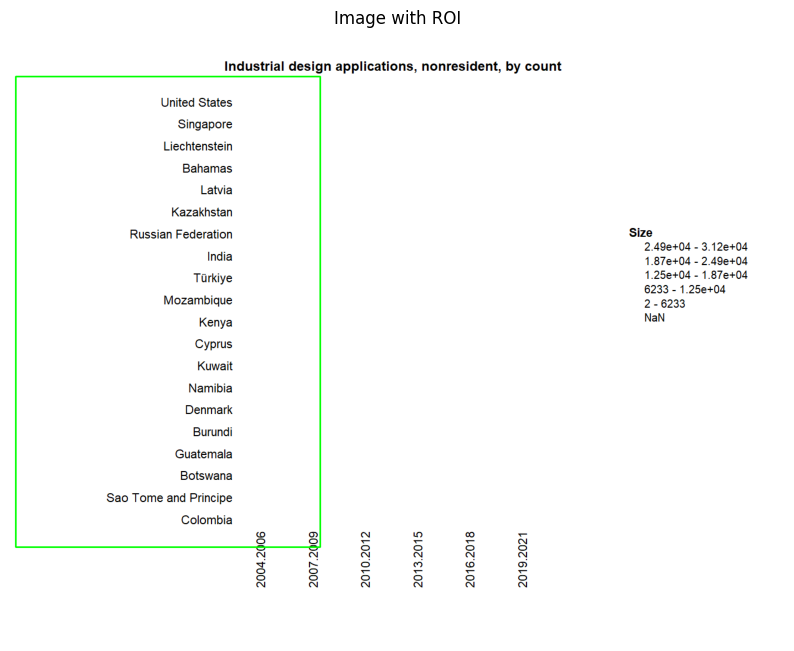

Extracted Text from ROI:
United States
Singapore
Liechtenstein
Bahamas

Latvia

Kazakhstan
Russian Federation
India

Turkiye
Mozambique
Kenya

Cyprus

Kuwait

Namibia

Denmark

Burundi

Guatemala
Botswana

Sao Tome and Principe

Colombia

106

109




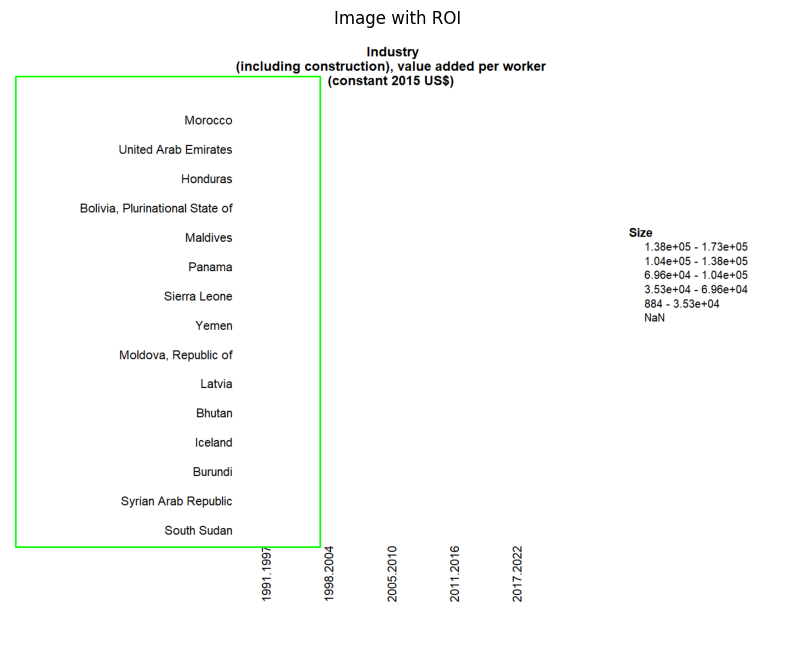

Extracted Text from ROI:
Morocco

United Arab Emirates
Honduras

Bolivia, Plurinational State of
Maldives

Panama

Sierra Leone

Yemen

Moldova, Republic of
Latvia

Bhutan

Iceland

Burundi

Syrian Arab Republic

South Sudan




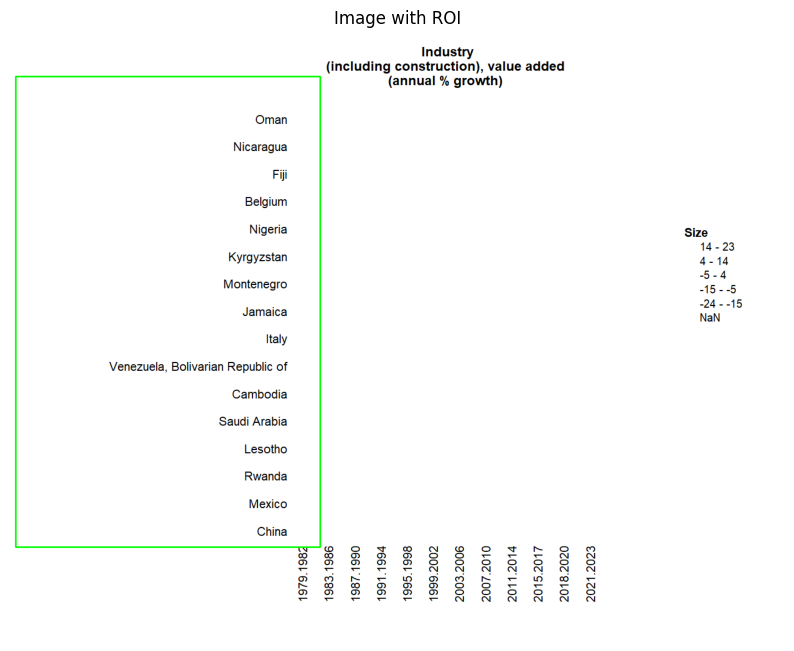

Extracted Text from ROI:
Oman
Nicaragua
Fiji

Belgium
Nigeria
Kyrgyzstan
Montenegro
Jamaica
Italy
Venezuela, Bolivarian Republic of
Cambodia
Saudi Arabia
Lesotho
Rwanda
Mexico

China




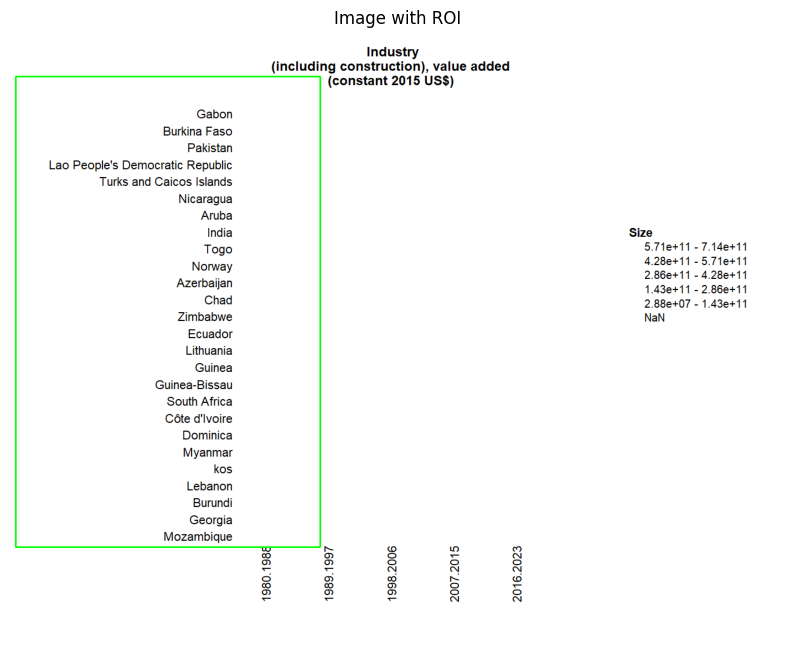

Extracted Text from ROI:
Gabon
Burkina Faso
Pakistan

Lao People's Democratic Republic
Turks and Caicos Islands
Nicaragua
Aruba

India

Togo

Norway
Azerbaijan
Chad
Zimbabwe
Ecuador
Lithuania
Guinea
Guinea-Bissau
South Africa
Céte d'Ivoire
Dominica
Myanmar

kos

Lebanon
Burundi
Georgia
Mozambique




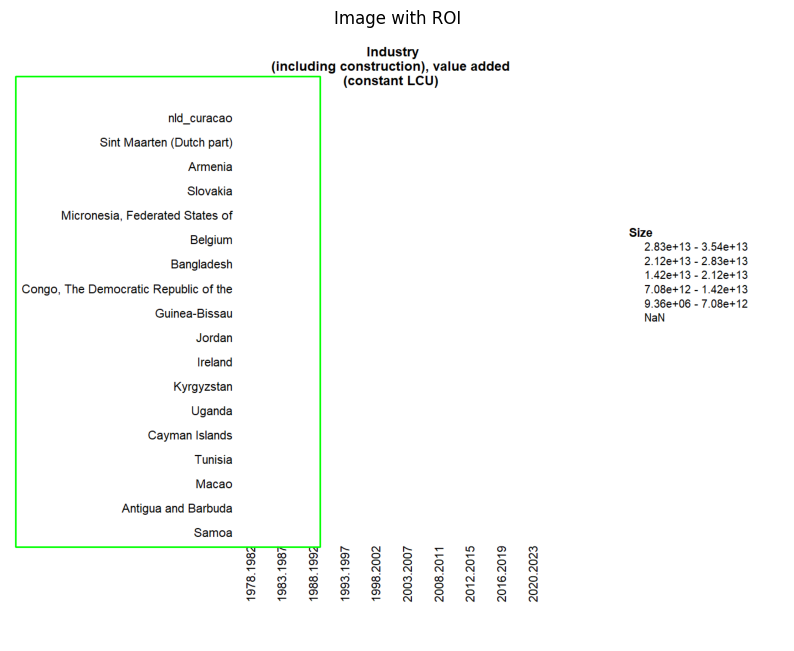

Extracted Text from ROI:
nid_curacao

Sint Maarten (Dutch part)
Armenia

Slovakia

Micronesia, Federated States of
Belgium

Bangladesh

Congo, The Democratic Republic of the
Guinea-Bissau

Jordan

Ireland

Kyrgyzstan

Uganda

Cayman Islands

Tunisia

Macao

Antigua and Barbuda

Samoa




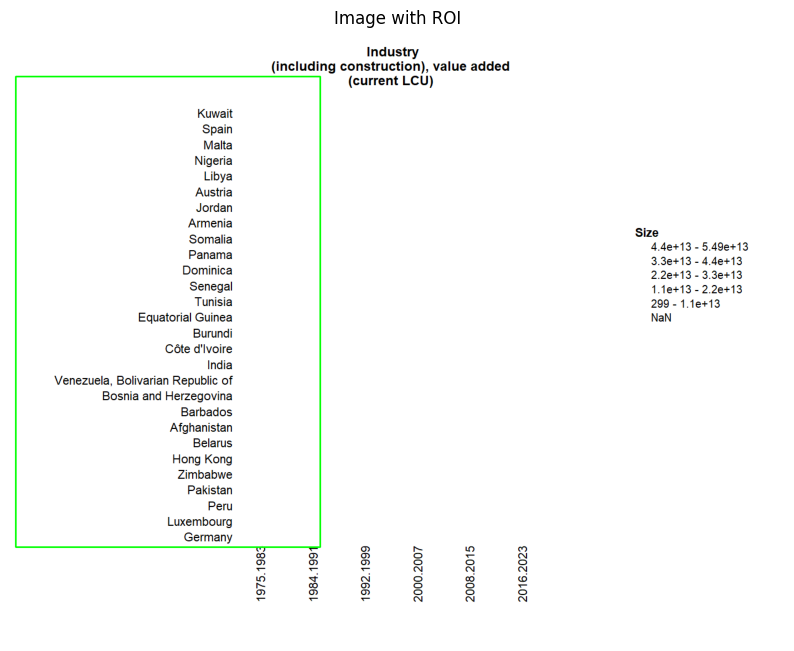

Extracted Text from ROI:
Kuwait

Spain

Malta

Nigeria

Libya

Austria

Jordan

Armenia

Somalia

Panama
Dominica
Senegal

Tunisia
Equatorial Guinea
Burundi

Céte d'Ivoire
India

Venezuela, Bolivarian Republic of
Bosnia and Herzegovina
Barbados
Afghanistan
Belarus

Hong Kong
Zimbabwe
Pakistan

Peru

Luxembourg
Germany




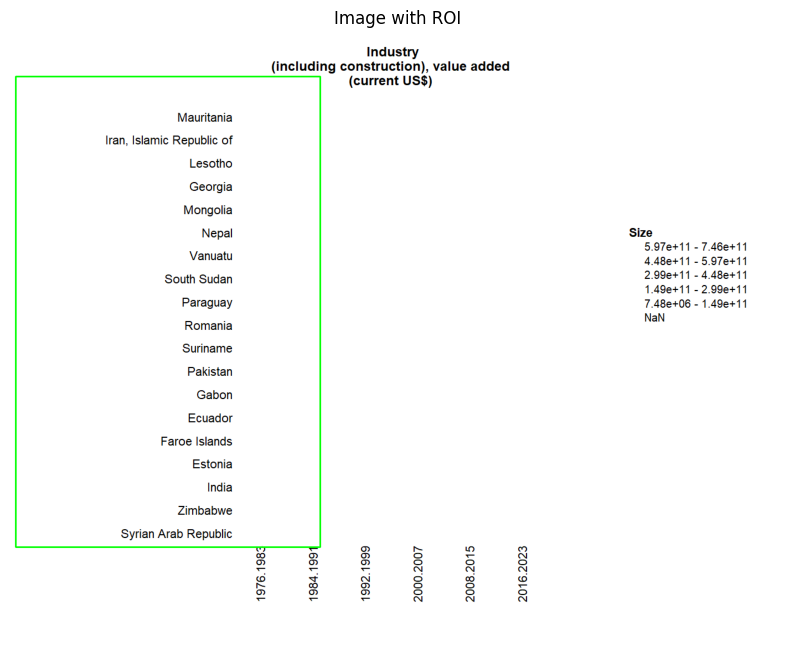

KeyboardInterrupt: 

In [9]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (10, 80, 550, 850)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Display the image with the ROI using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with ROI")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the cropped region
        text = pytesseract.image_to_string(gray_cropped)

        print("Extracted Text from ROI:")
        print(text)

## Extract Values from Legend

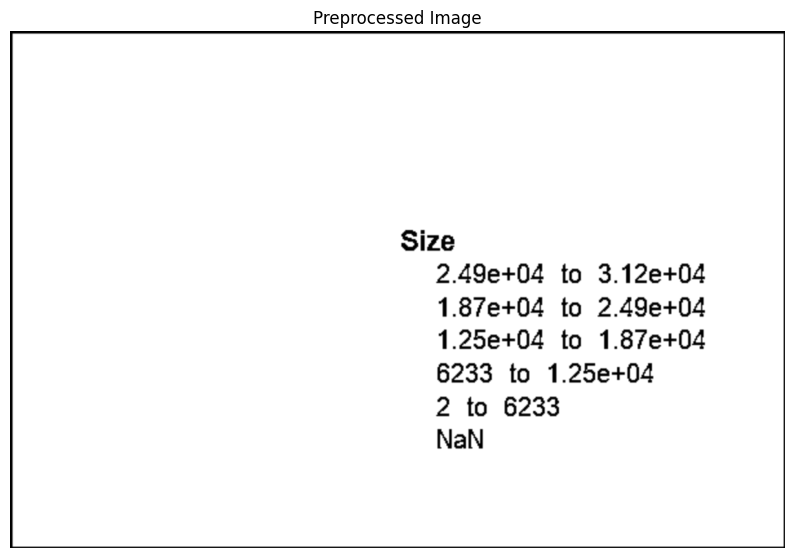

Extracted Text from ROI:
Size
2.49e+04 to 3.12e+04
1.87e+04 to 2.49e+04
1.25e+04 to 1.87e+04
6233 to 1.25e+04
2 to 6233
NaN



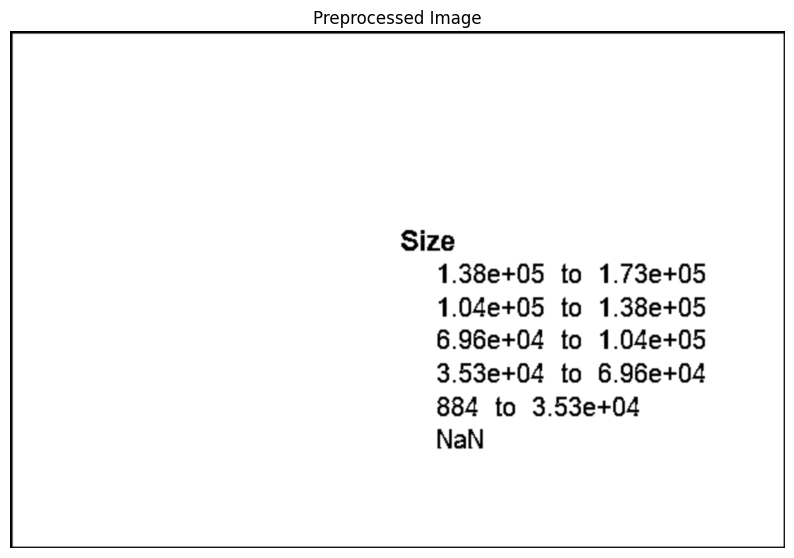

Extracted Text from ROI:
Size
1.38e+05 to 1.73e+05
1.04e+05 to 1.38e+05
6.96e+04 to 1.04e+05
3.53e+04 to 6.96e+04
884 to 3.53e+04
NaN



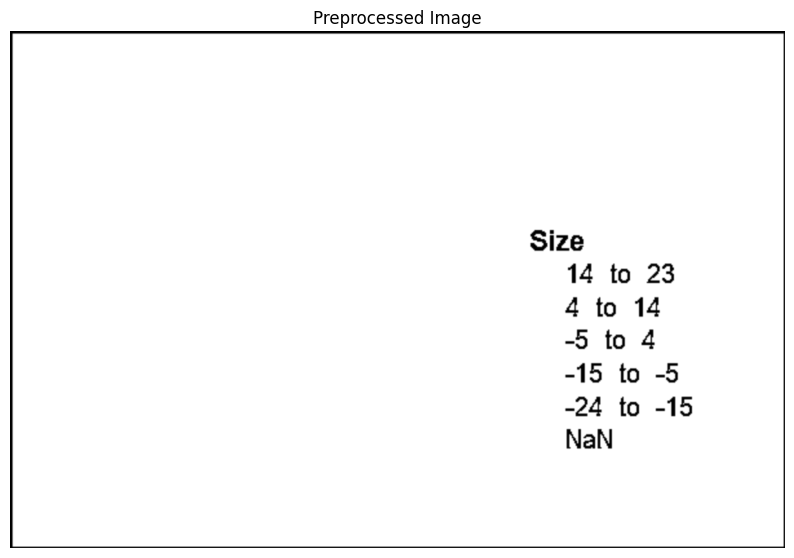

Extracted Text from ROI:
Size
14 to 23
4 to 14
-5 to 4
-15 to -5
-24 to -15
NaN



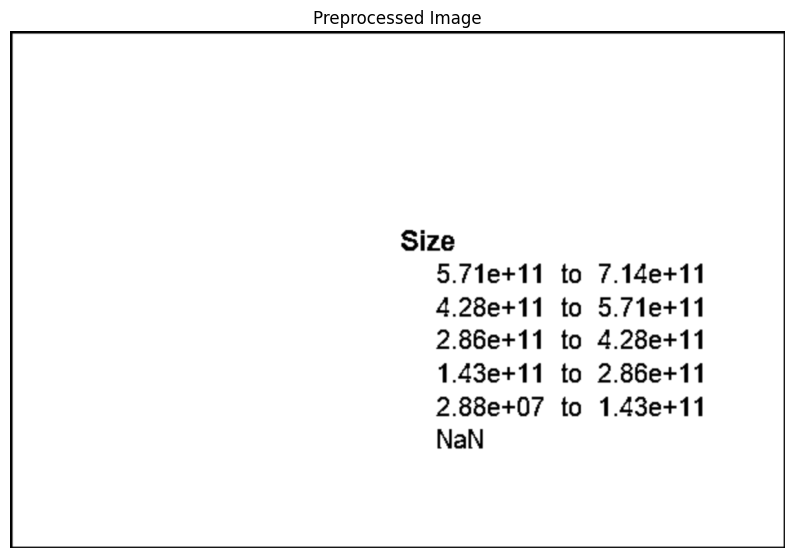

Extracted Text from ROI:
Size
5.71e+11 to 7.14e+11
4.28e+11 to 5.71e+11
2.86e+11 to 4.28e+11
1.43e+11 to 2.86e+11
2.88e+07 to 1.43e+11
NaN



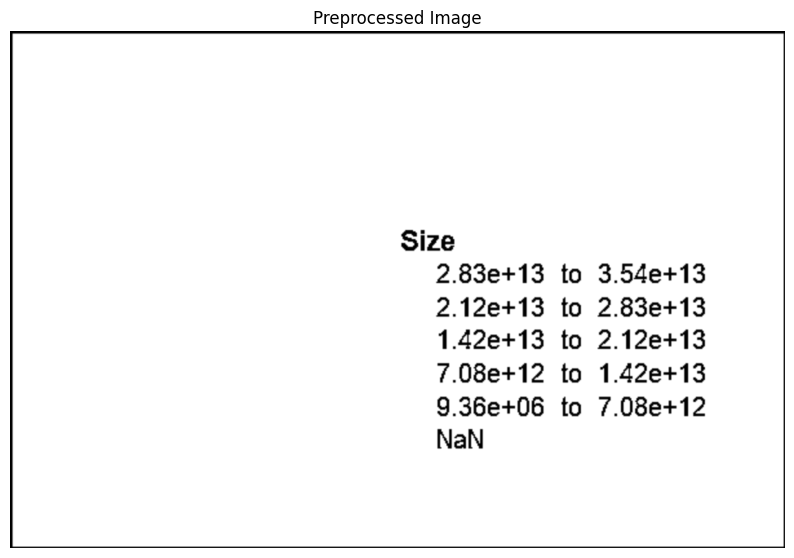

Extracted Text from ROI:
Size
2.83e+13 to 3.54e+13
2.12e+13 to 2.83e+13
1.42e+13 to 2.12e+13
7.08e+12 to 1.42e+13
9.36e+06 to 7.08e+12
NaN



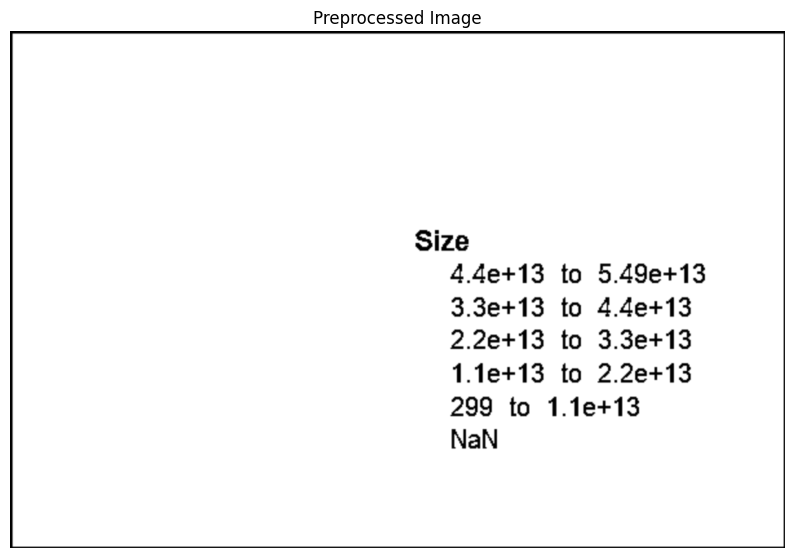

Extracted Text from ROI:
Size
4.4e+13 to 5.49e+13
3.3e+13 to 4.4e+13
2.2e+13 to 3.3e+13
1.1e+13 to 2.2e+13
299 to 1.1e+13
NaN



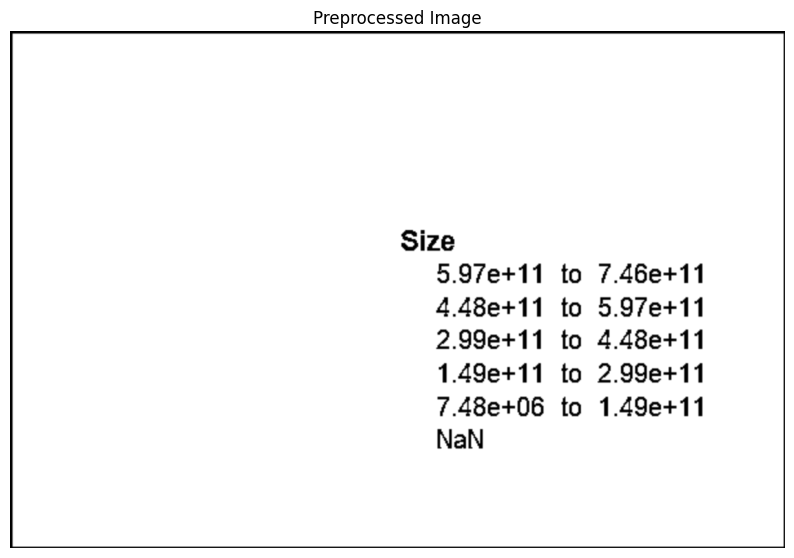

Extracted Text from ROI:
Size
5.97e+11 to 7.46e+11
4.48e+11 to 5.97e+11
2.99e+11 to 4.48e+11
1.49e+11 to 2.99e+11
7.48e+06 to 1.49e+11
NaN



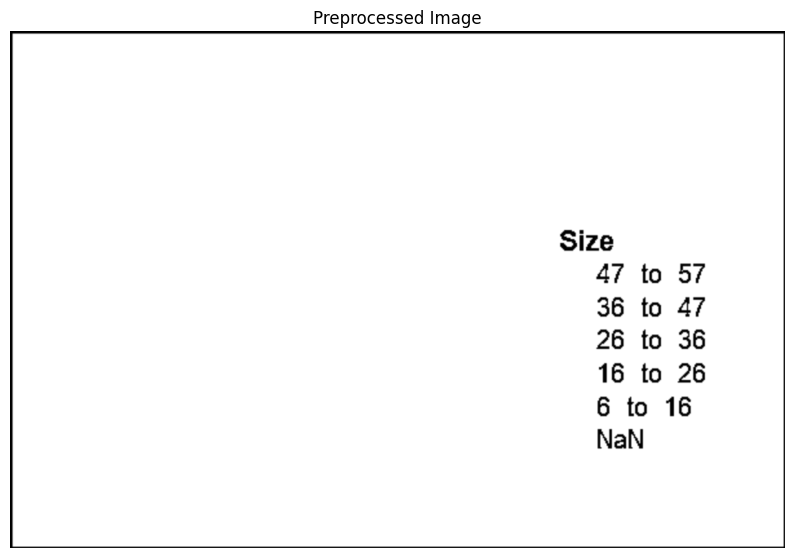

Extracted Text from ROI:
Size
47 to 57
36 to 47
26 to 36
16 to 26
6 to 16
NaN



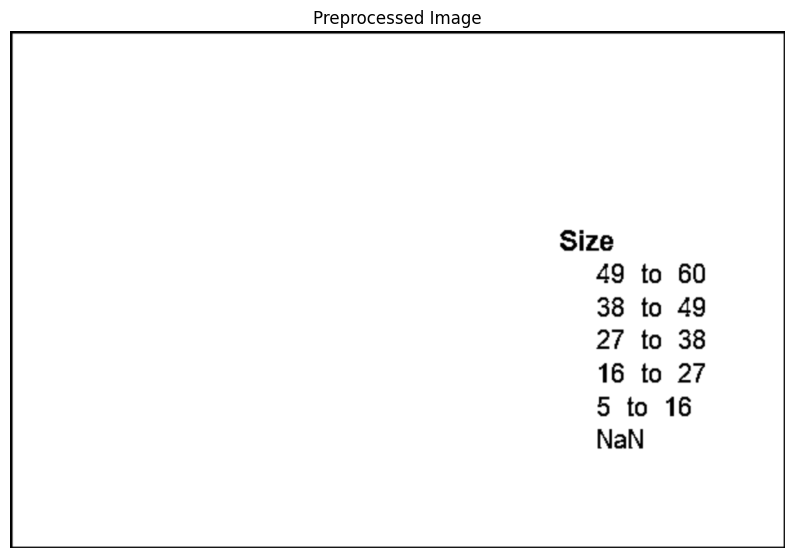

Extracted Text from ROI:
Size
49 to 60
38 to 49
27 to 38
16 to 27
5 to 16
NaN



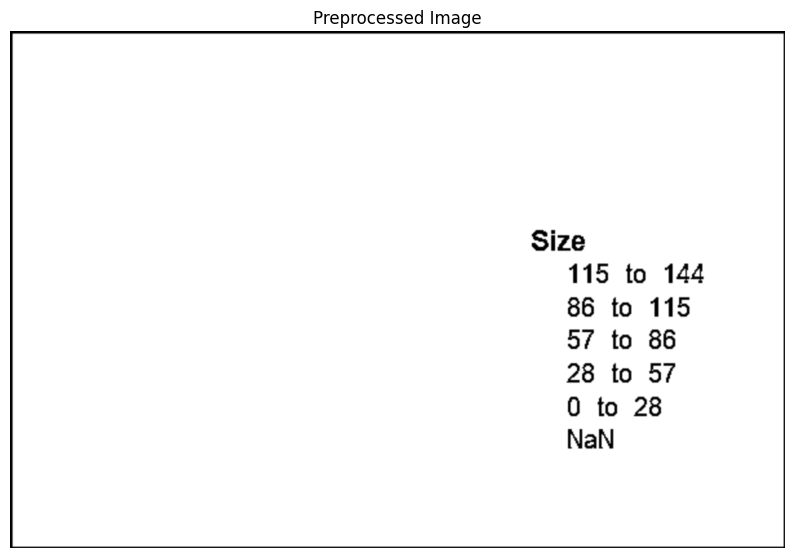

Extracted Text from ROI:
Size
115 to 144
86 to 115
57 to 86
28 to 57
0 to 28
NaN



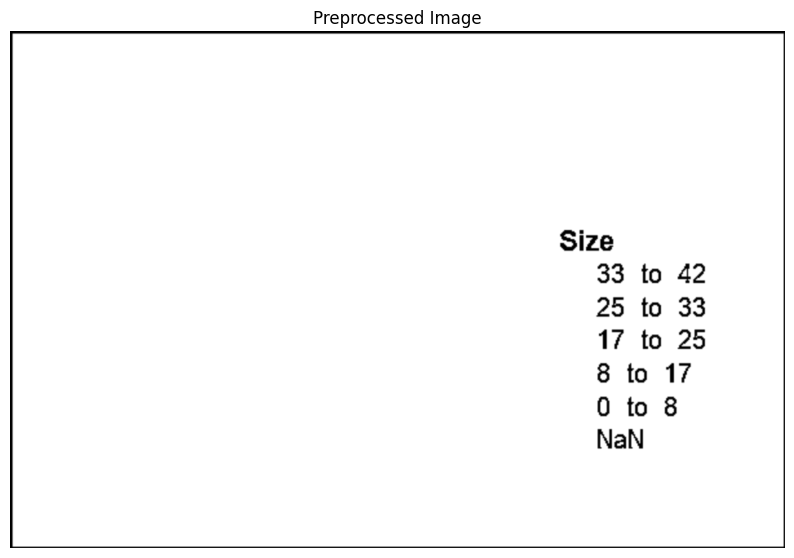

Extracted Text from ROI:
Size
33 to 42
25 to 33
17 to 25
8 to 17
0 to 8
NaN



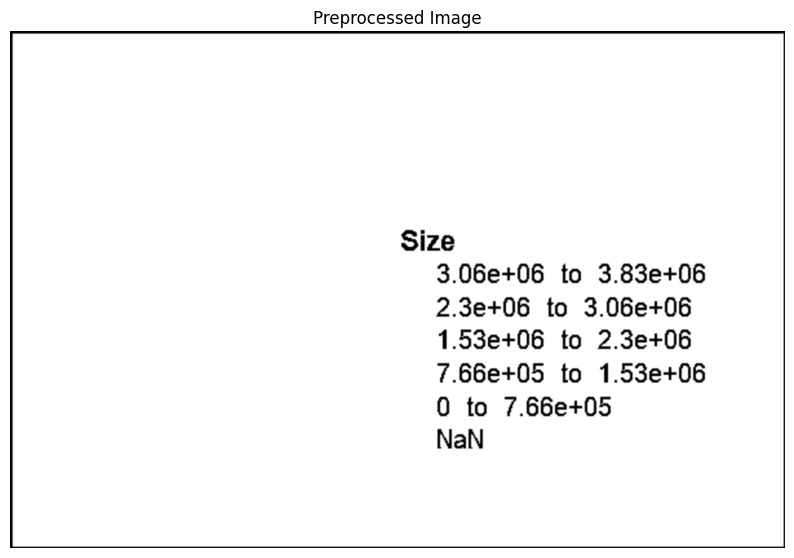

Extracted Text from ROI:
Size
3.06e+06 to 3.83e+06
2.3e+06 to 3.06e+06
1.53e+06 to 2.3e+06
7.66e+05 to 1.53e+06
0 to 7.66e+05
NaN



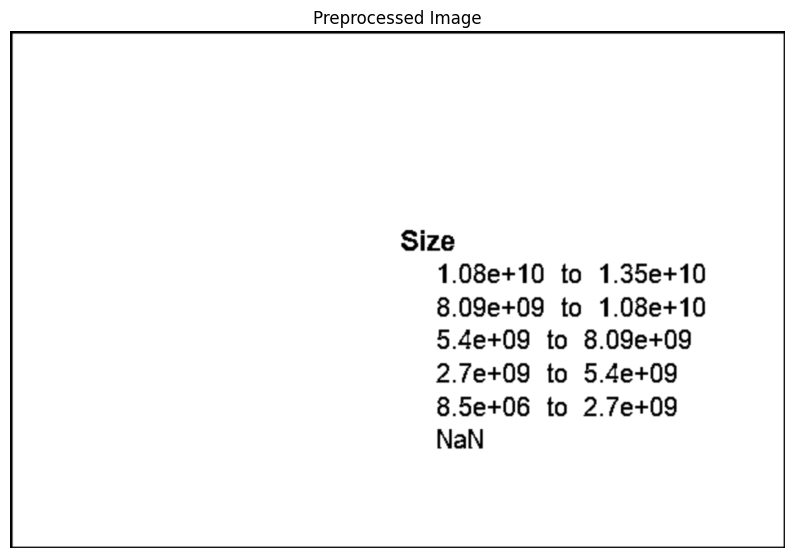

Extracted Text from ROI:
Size
1.08e+10 to 1.35e+10
8.09e+09 to 1.08e+10
5.4e+09 to 8.09e+09
2.7e+09 to 5.4e+09
8.5e+06 to 2.7e+09
NaN



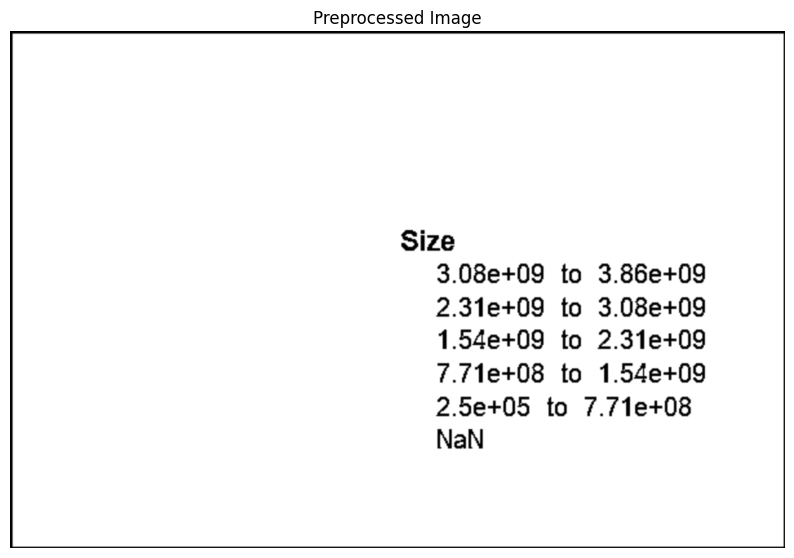

Extracted Text from ROI:
Size
3.08e+09 to 3.86e+09
2.31e+09 to 3.08e+09
1.54e+09 to 2.31e+09
7.71e+08 to 1.54e+09
2.5e+05 to 7.71e+08
NaN



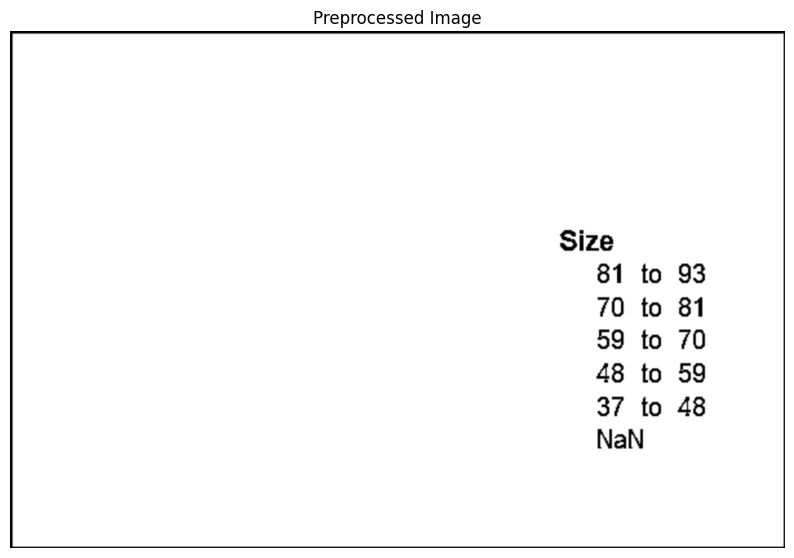

Extracted Text from ROI:
Size
81 to 93
70 to 81
59 to 70
48 to 59
37 to 48
NaN



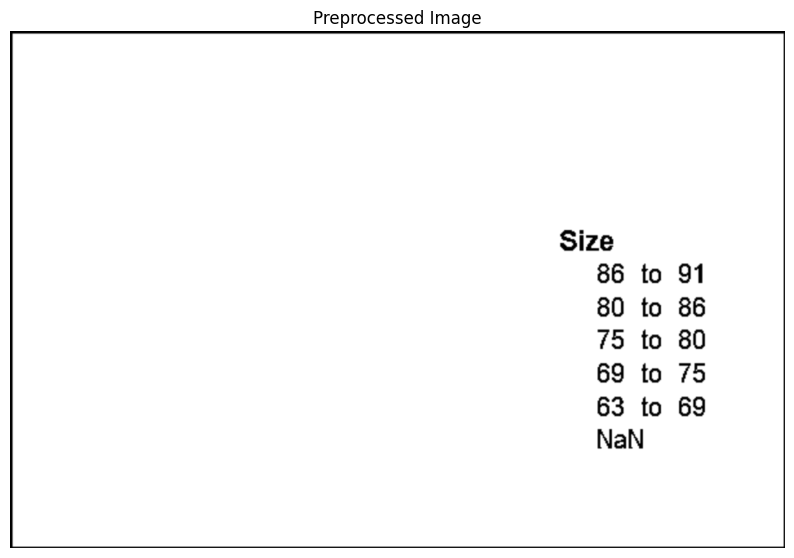

Extracted Text from ROI:
Size
86 to 91
80 to 86
75 to 80
69 to 75
63 to 69
NaN



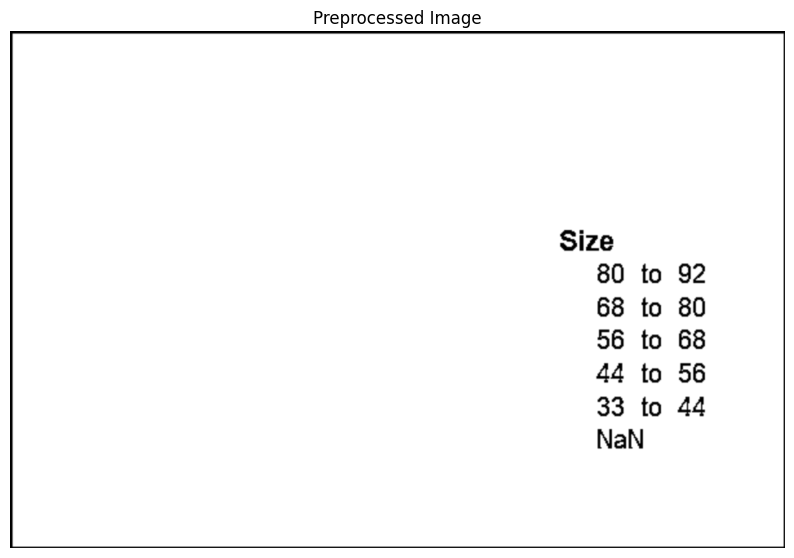

Extracted Text from ROI:
Size
80 to 92
68 to 80
56 to 68
44 to 56
33 to 44
NaN



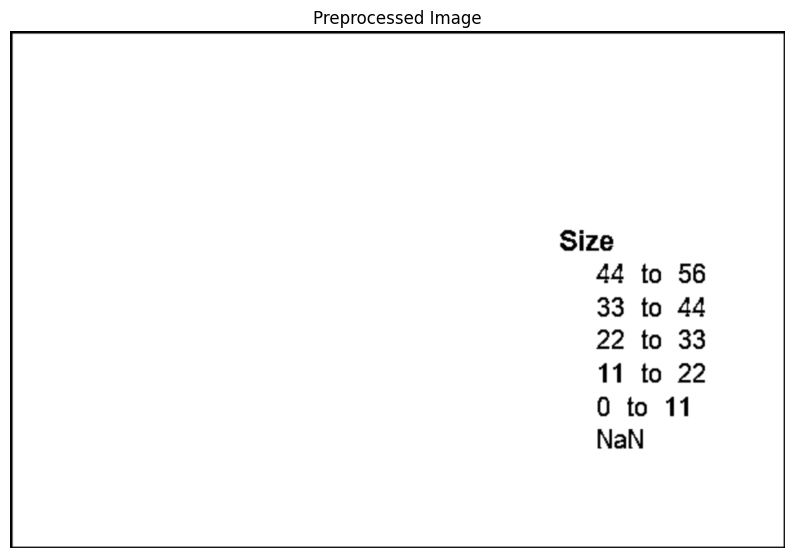

Extracted Text from ROI:
Size
44 to 56
33 to 44
22 to 33
11 to 22
0 to 11
NaN



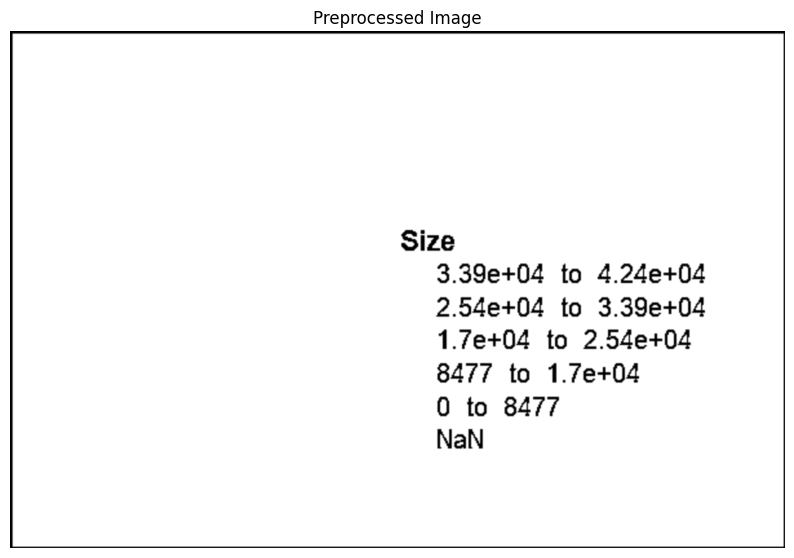

Extracted Text from ROI:
Size
3.39e+04 to 4.24e+04
2.54e+04 to 3.39e+04
1.7e+04 to 2.54e+04
8477 to 1.7e+04
0 to 8477
NaN



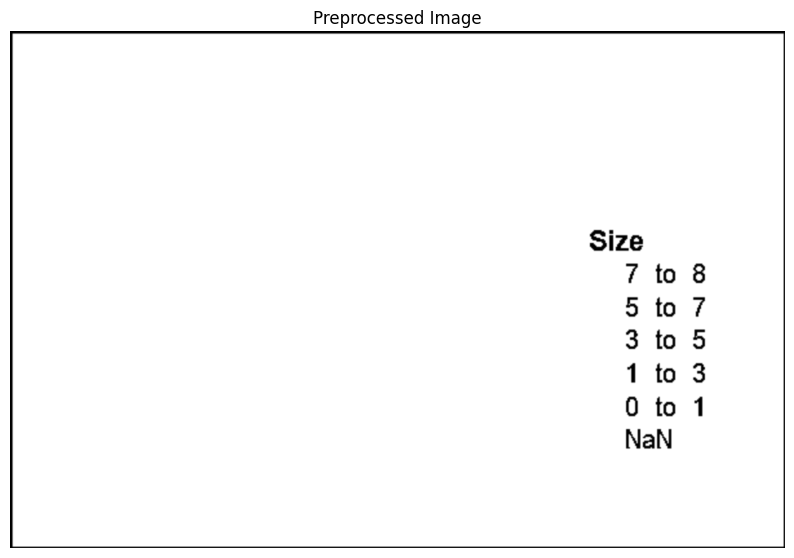

Extracted Text from ROI:
Size
7 to 8
5 to 7
3 to 5
1 to 3
0 to 1
NaN



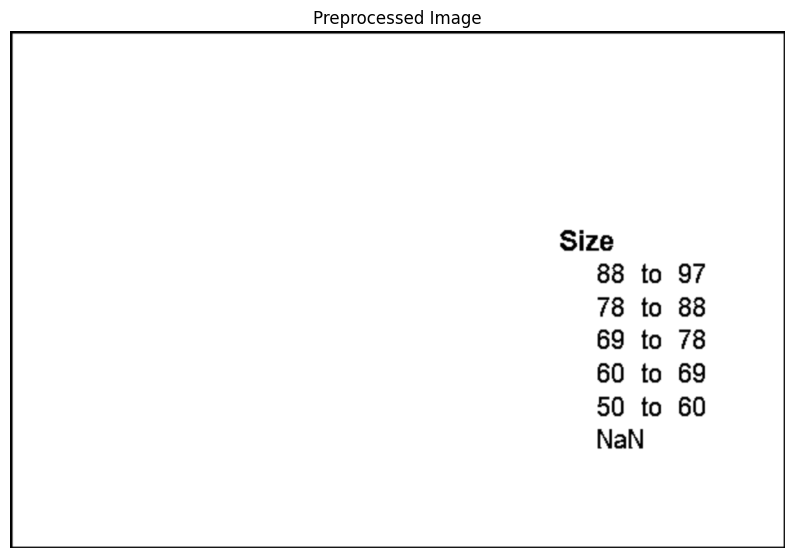

Extracted Text from ROI:
Size
88 to 97
78 to 88
69 to 78
60 to 69
50 to 60
NaN



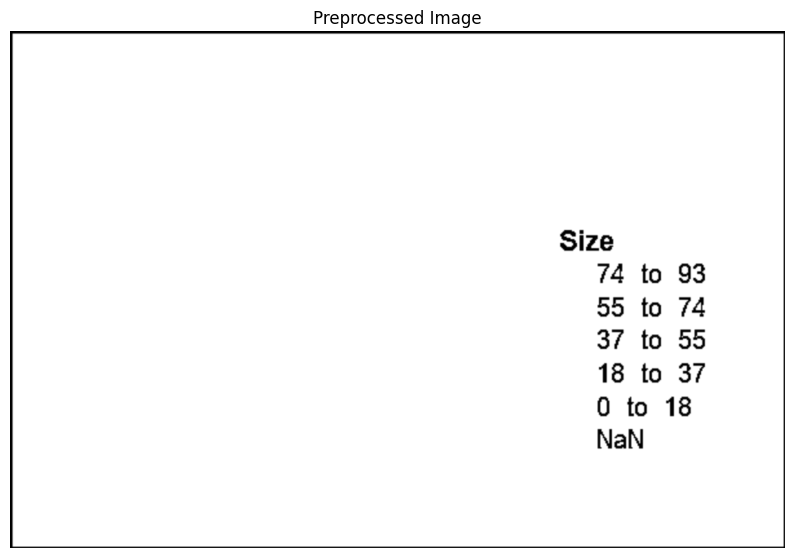

Extracted Text from ROI:
Size
74 to 93
55 to 74
37 to 55
18 to 37
0 to 18
NaN



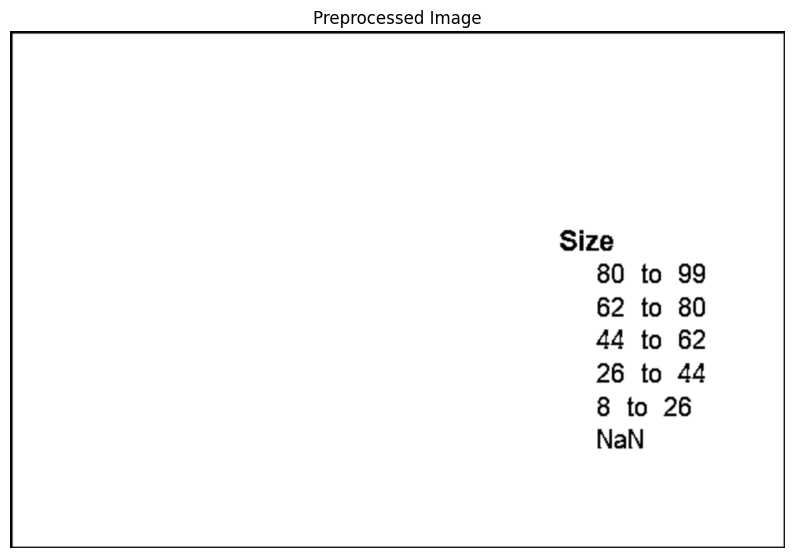

Extracted Text from ROI:
Size
80 to 99
62 to 80
44 to 62
26 to 44
8 to 26
NaN



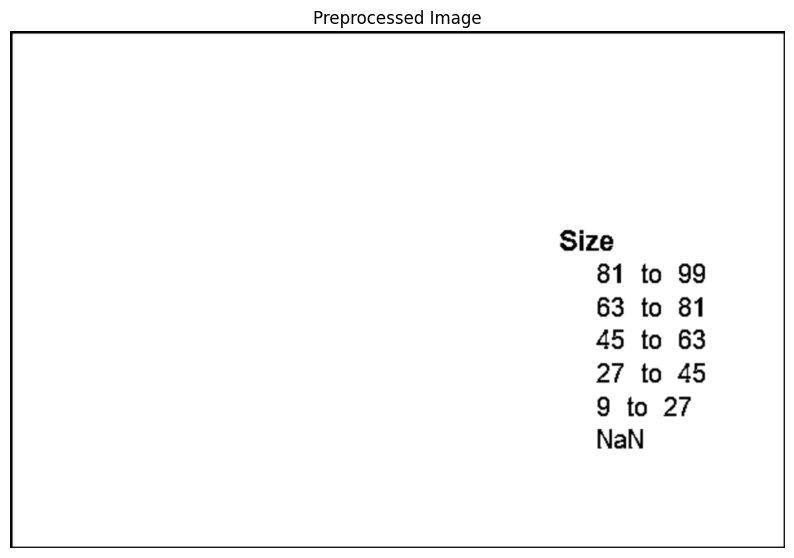

Extracted Text from ROI:
Size
81 to 99
63 to 81
45 to 63
27 to 45
9 to 27
NaN



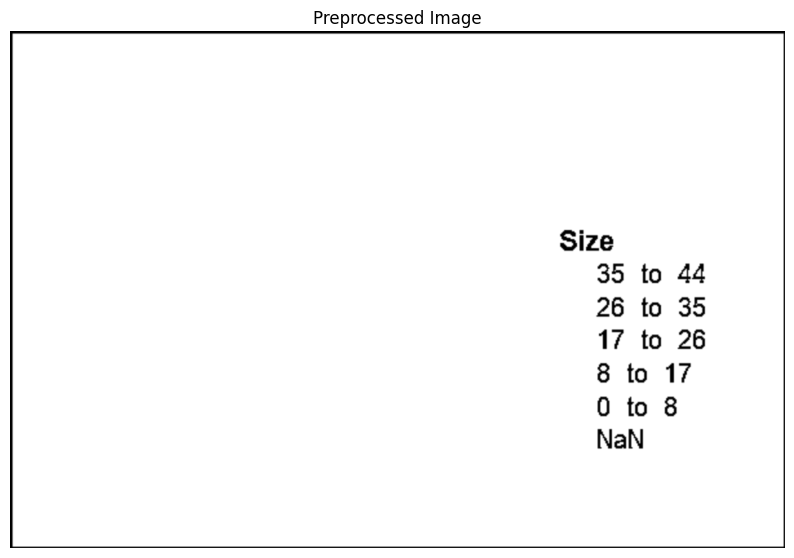

Extracted Text from ROI:
Size
35 to 44
26 to 35
17 to 26
8 to 17
0 to 8
NaN



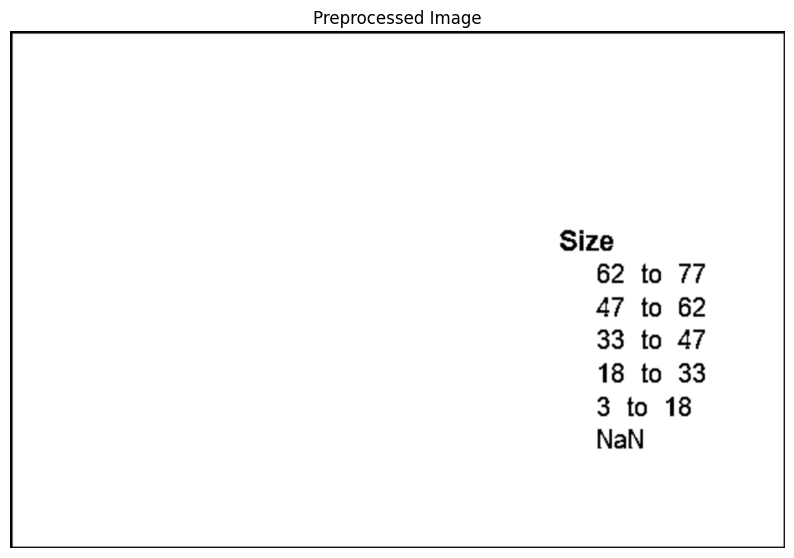

Extracted Text from ROI:
Size
62 to 77
47 to 62
33 to 47
18 to 33
3 to 18
NaN



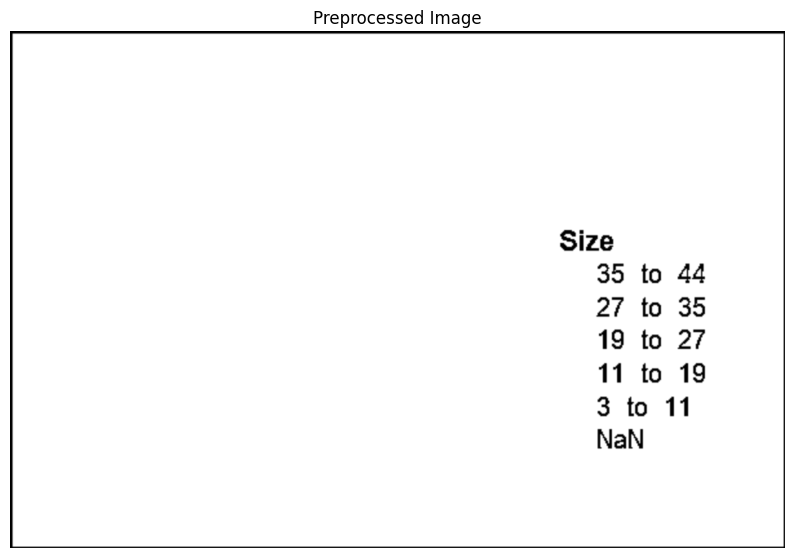

Extracted Text from ROI:
Size
35 to 44
27 to 35
19 to 27
11 to 19
3 to 11
NaN



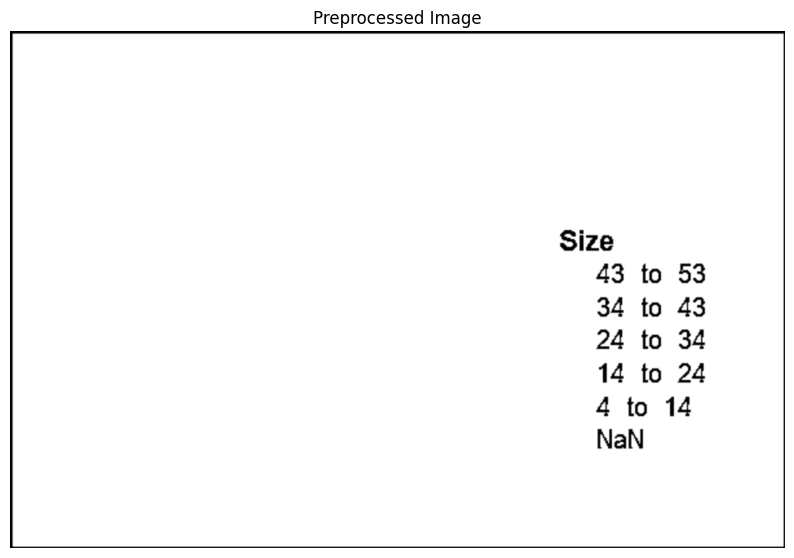

Extracted Text from ROI:
Size
43 to 53
34 to 43
24 to 34
14 to 24
4 to 14
NaN



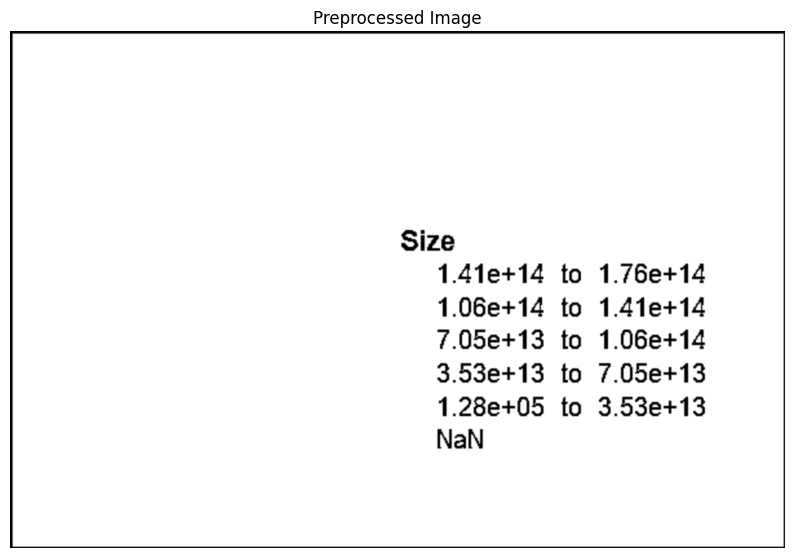

Extracted Text from ROI:
Size
1.41e+14 to 1.76e+14
1.06e+14 to 1.41e+14
7.05e+13 to 1.06e+14
3.53e+13 to 7.05e+13
1.28e+05 to 3.53e+13
NaN



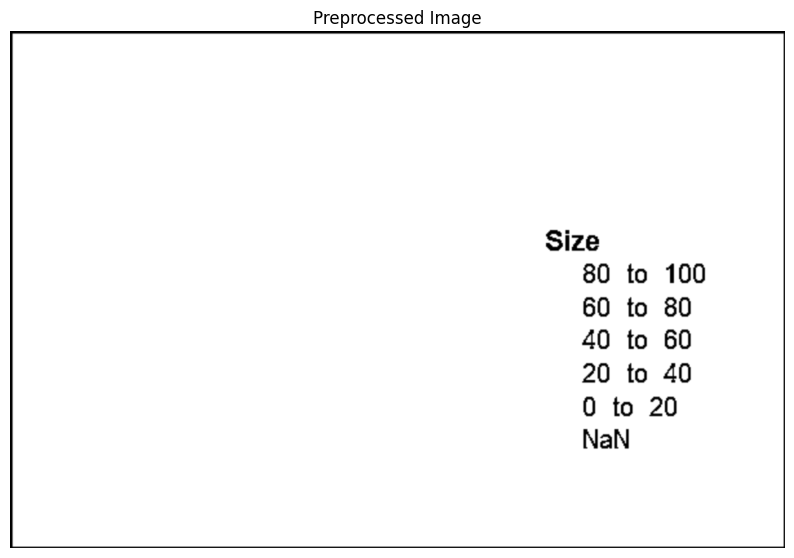

Extracted Text from ROI:
Size
80 to 100
60 to 80
40 to 60
20 to 40
0 to 20
NaN



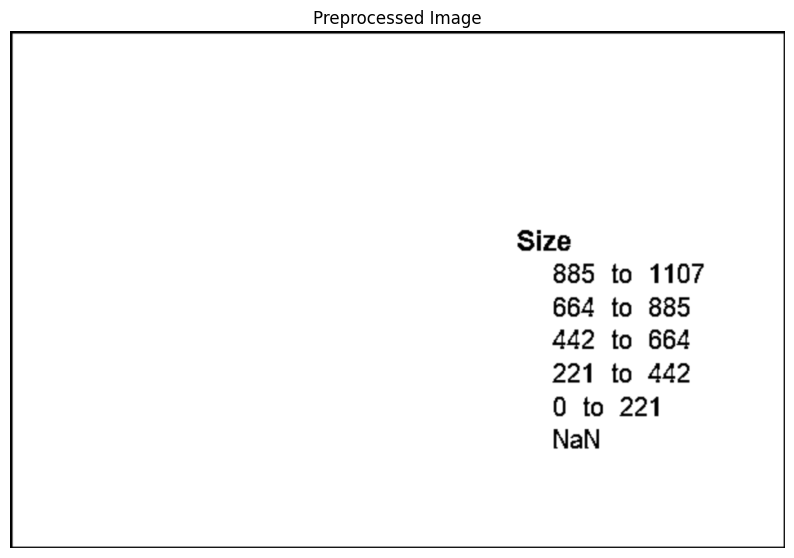

Extracted Text from ROI:
Size
885 to 1107
664 to 885
442 to 664
221 to 442
0 to 221
NaN



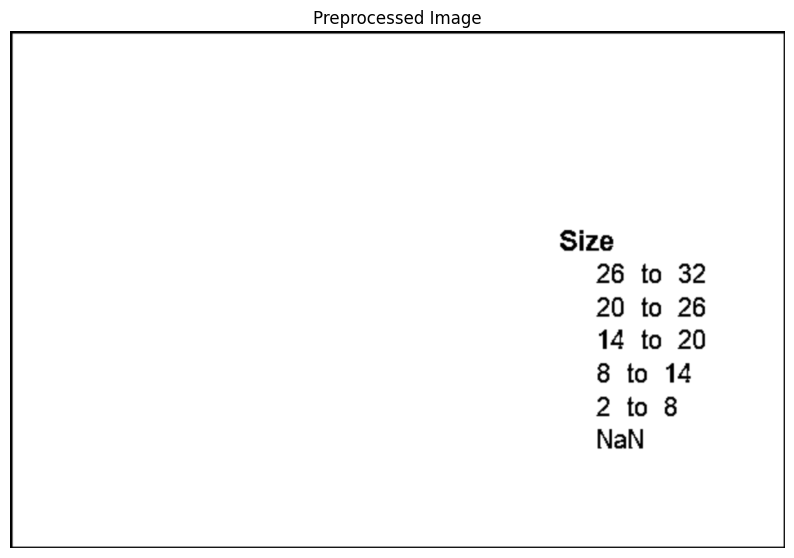

Extracted Text from ROI:
Size
26 to 32
20 to 26
14 to 20
8 to 14
2 to 8
NaN



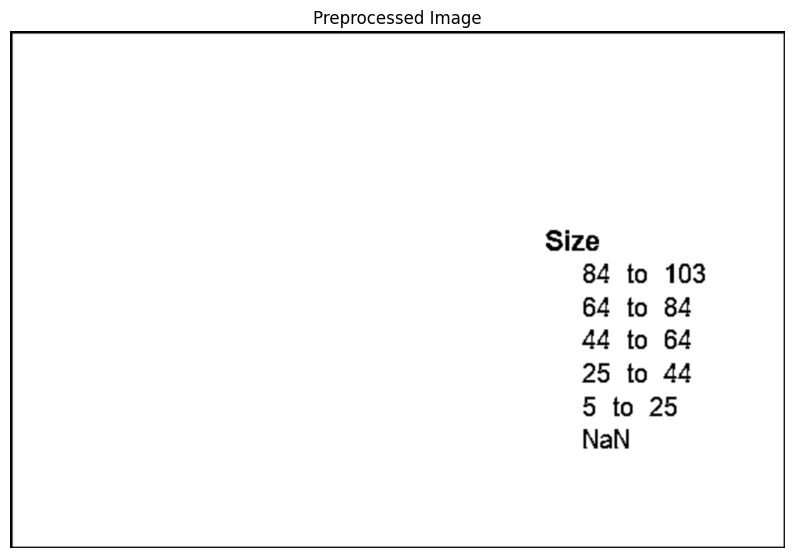

Extracted Text from ROI:
Size
84 to 103
64 to 84
44 to 64
25 to 44
5 to 25
NaN



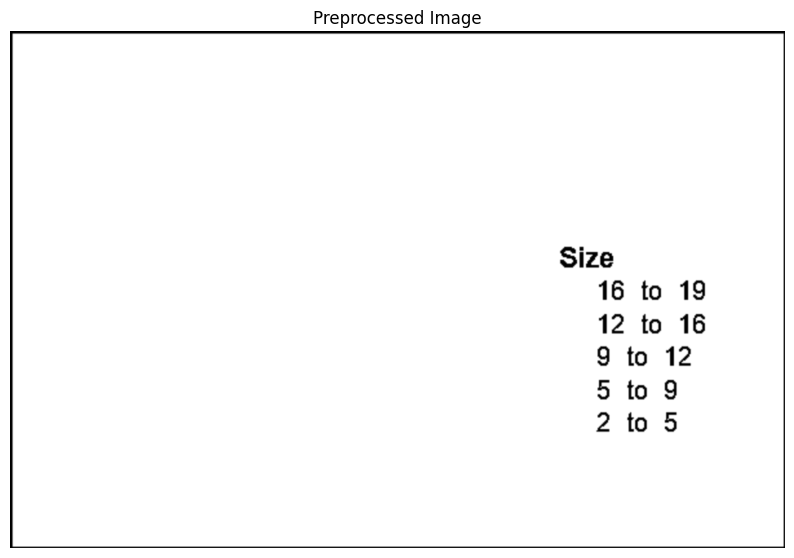

Extracted Text from ROI:
Size
16 to 19
12 to 16
9 to 12
5 to 9
2 to 5



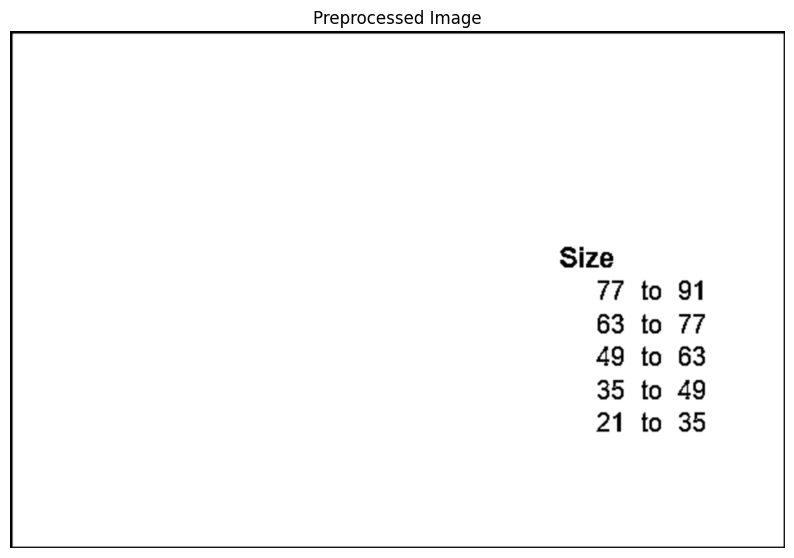

Extracted Text from ROI:
Size
77 to 91
63 to 77
49 to 63
35 to 49
21 to 35



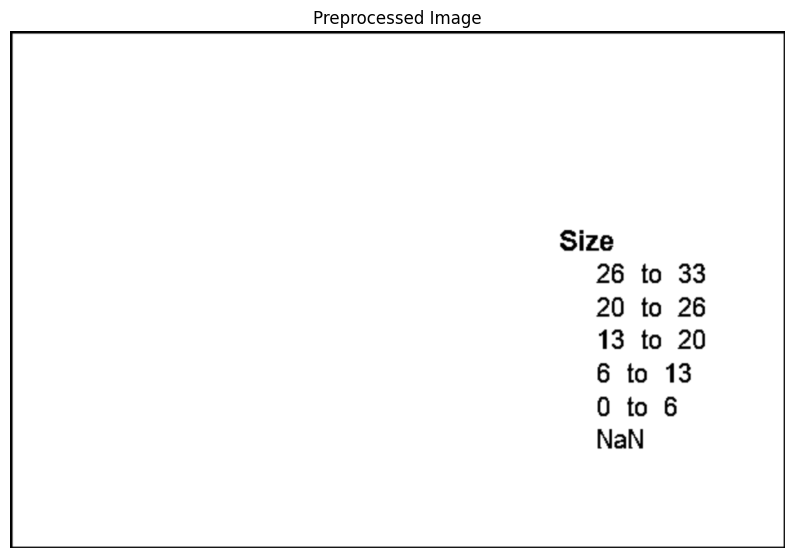

Extracted Text from ROI:
Size
26 to 33
20 to 26
13 to 20
6 to 13
0 to 6
NaN



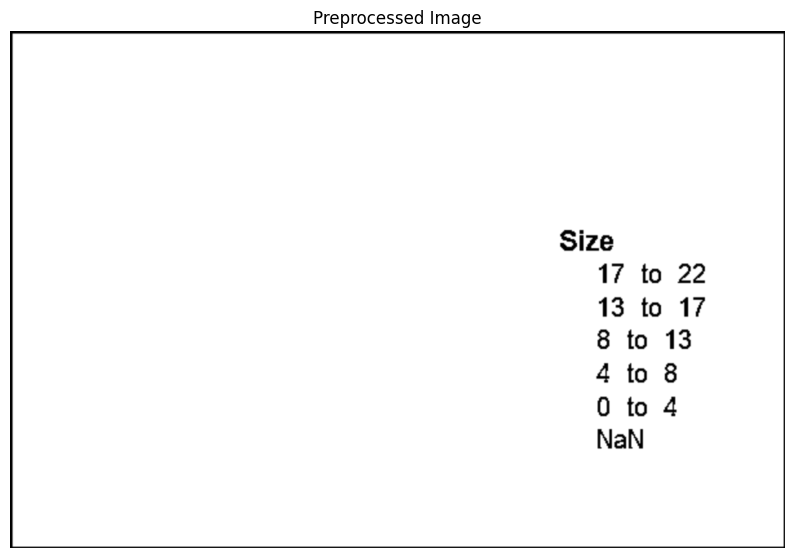

Extracted Text from ROI:
Size
17 to 22
13 to 17
8 to 13
4 to 8
0 to 4
NaN



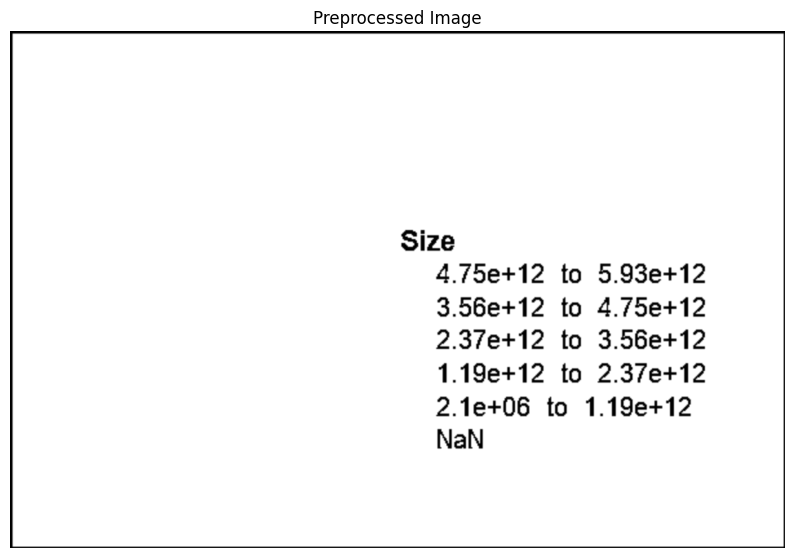

Extracted Text from ROI:
Size
4.75e+12 to 5.93e+12
3.56e+12 to 4.75e+12
2.37e+12 to 3.56e+12
1.19e+12 to 2.37e+12
2.1e+06 to 1.19e+12
NaN



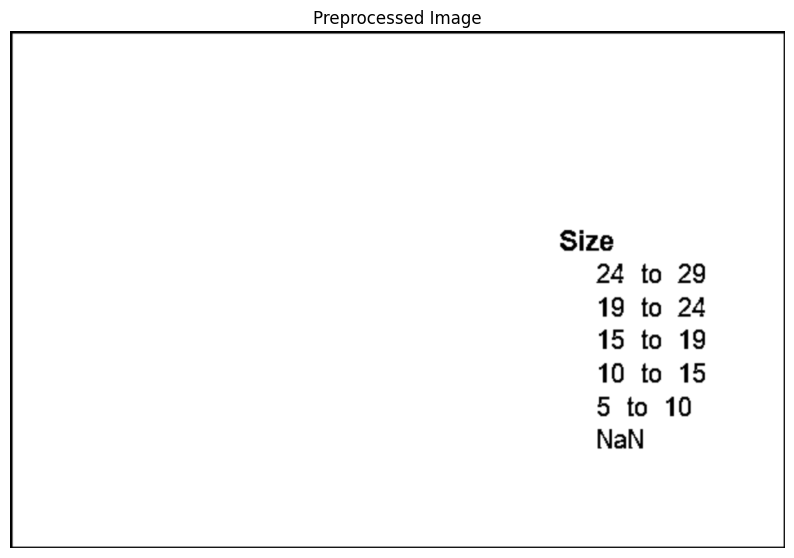

Extracted Text from ROI:
Size
24 to 29
19 to 24
15 to 19
10 to 15
5 to 10
NaN



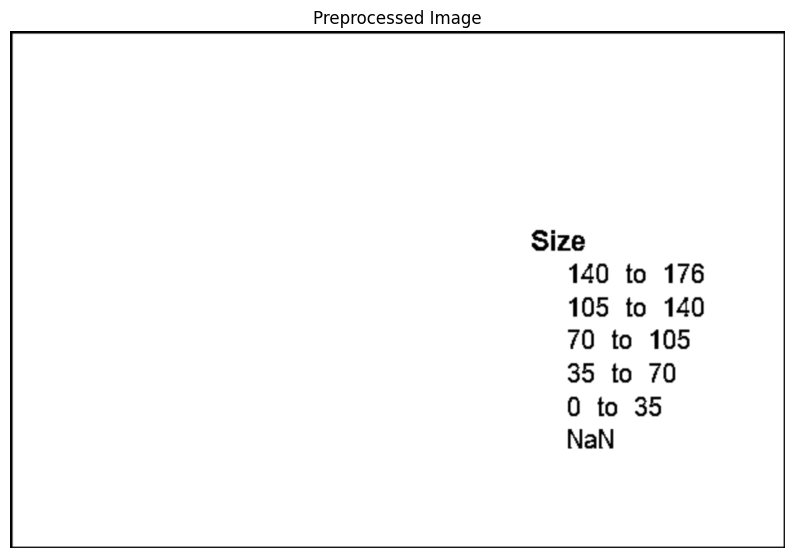

Extracted Text from ROI:
Size
140 to 176
105 to 140
70 to 105
35 to 70
0 to 35
NaN



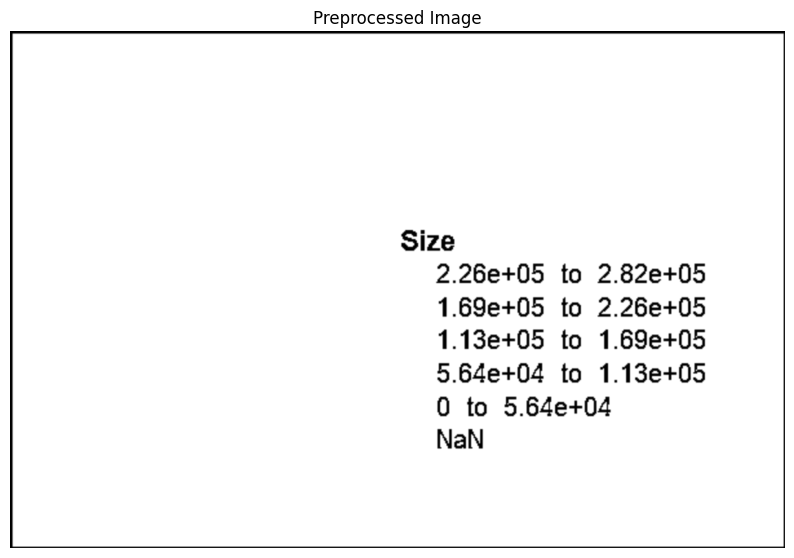

Extracted Text from ROI:
Size
2.26e+05 to 2.82e+05
1.69e+05 to 2.26e+05
1.13e+05 to 1.69e+05
5.64e+04 to 1.13e+05
0 to 5.64e+04
NaN



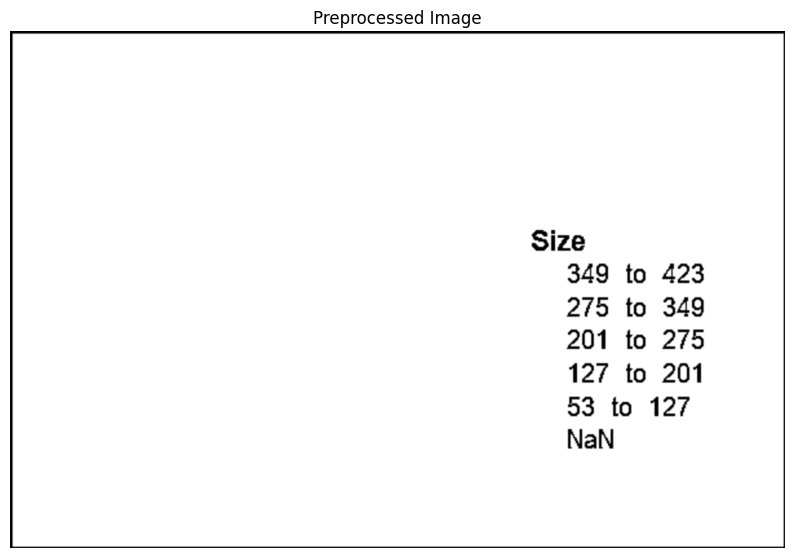

Extracted Text from ROI:
Size
349 to 423
275 to 349
201 to 275
127 to 201
53 to 127
NaN



In [12]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (800, 200, 600, 400)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Preprocessing steps
        # Convert the cropped image to grayscale
        gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Apply adaptive thresholding with a different block size and constant
        adaptive_thresh_image = cv2.adaptiveThreshold(
            gray_cropped, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 8
        )

        # Resize the image to improve OCR accuracy
        resized_image = cv2.resize(adaptive_thresh_image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

        # Display the preprocessed image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(resized_image, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Use Tesseract to extract text from the preprocessed image
        custom_config = r'--oem 3 --psm 6'
        text = pytesseract.image_to_string(resized_image, config=custom_config)

        print("Extracted Text from ROI:")
        print(text)

## Extracting Labels in X-Axis

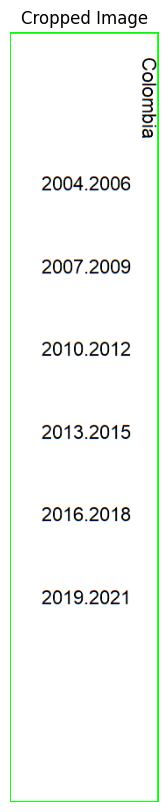

Extracted Text from Rotated ROI:
2004.2006

2007.2009

2010.2012

2013.2015

2016.2018

2019.2021

eIqWojOD




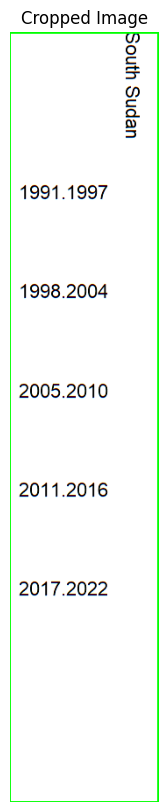

Extracted Text from Rotated ROI:
1991.1997

1998.2004

2005.2010

2011.2016

2017.2022

uepng yynog




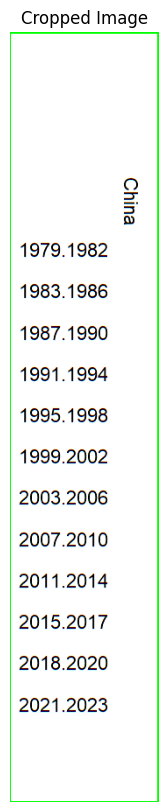

Extracted Text from Rotated ROI:
1979.1982
1983.1986
1987.1990
1991.1994
1995.1998
1999.2002
2003.2006
2007.2010
2011.2014
2015.2017
2018.2020

2021.2023

eulyd




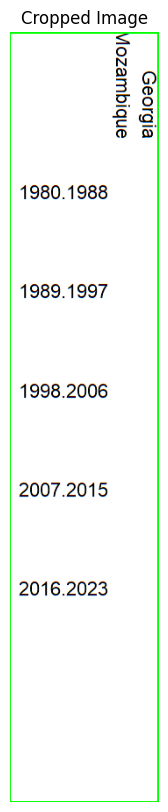

Extracted Text from Rotated ROI:
1980.1988

1989.1997

1998.2006

2007.2015

2016.2023

enbiquiezo}
eIBi0es




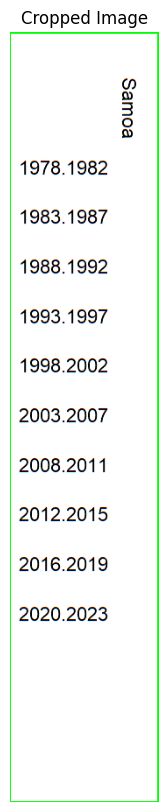

Extracted Text from Rotated ROI:
1978.1982

1983.1987

1988.1992

1993.1997

1998.2002

2003.2007

2008.2011

2012.2015

2016.2019

2020.2023

eowes




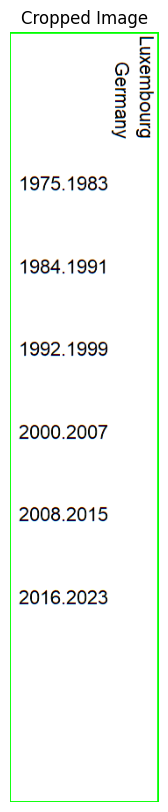

Extracted Text from Rotated ROI:
Auewlas

1975.1983

1984.1991

1992.1999

2000.2007

2008.2015

2016.2023

6unoquexn7




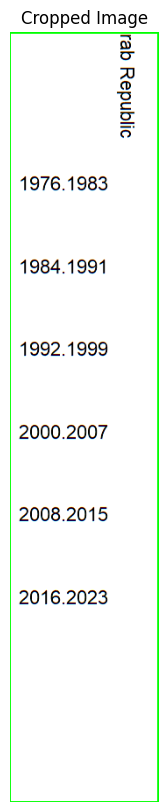

Extracted Text from Rotated ROI:
1976.1983

1984.1991

1992.1999

2000.2007

2008.2015

2016.2023

aiqndey qe




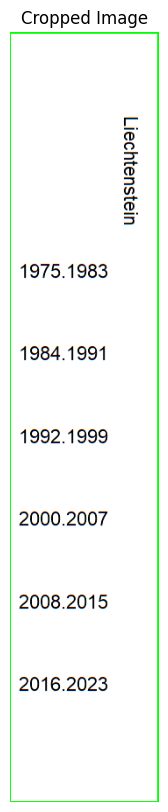

Extracted Text from Rotated ROI:
1975.1983

1984.1991

1992.1999

2000.2007

2008.2015

2016.2023

ula}sua}yo9rq




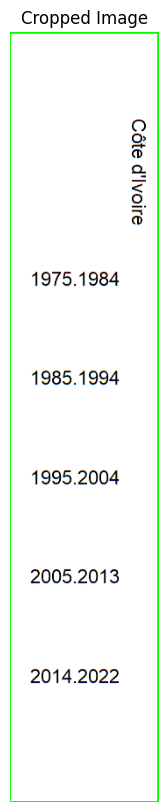

Extracted Text from Rotated ROI:
1975.1984

1985.1994

1995.2004

2005.2013

2014.2022

BIIOAL,P 8}9D




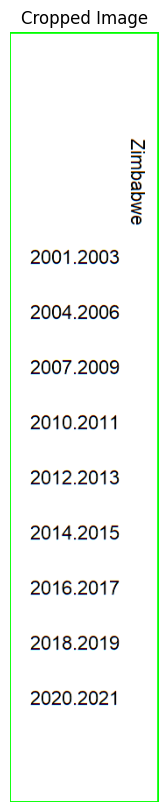

Extracted Text from Rotated ROI:
2001.2003

2004.2006

2007.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2019

2020.2021

aMqequiZ




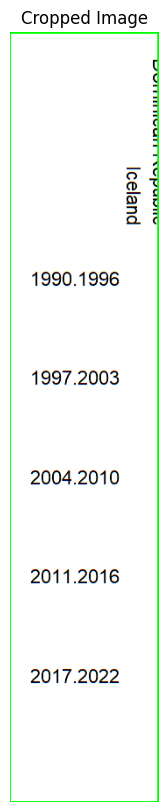

Extracted Text from Rotated ROI:
1990.1996

1997.2003

2004.2010

2011.2016

2017.2022

puejas|

anda,




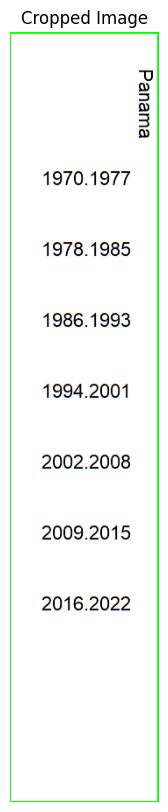

Extracted Text from Rotated ROI:
1970.1977

1978.1985

1986.1993

1994.2001

2002.2008

2009.2015

2016.2022

eweued




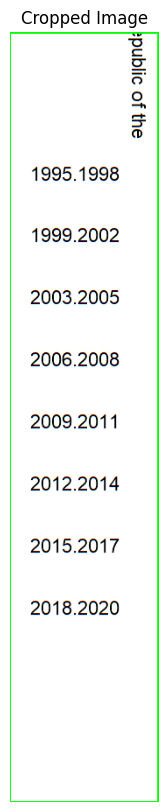

Extracted Text from Rotated ROI:
1995.1998

1999.2002

2003.2005

2006.2008

2009.2011

2012.2014

2015.2017

2018.2020

au JO o1jqnd




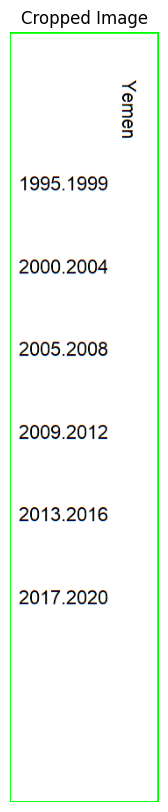

Extracted Text from Rotated ROI:
1995.1999

2000.2004

2005.2008

2009.2012

2013.2016

2017.2020

uae A




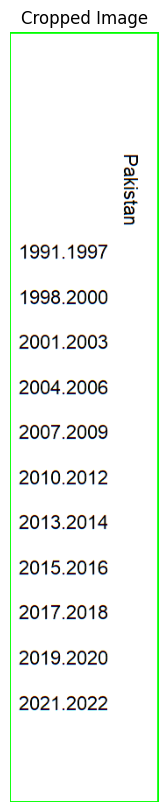

Extracted Text from Rotated ROI:
1991.1997

1998.2000

2001.2003

2004.2006

2007.2009

2010.2012

2013.2014

2015.2016

2017.2018

2019.2020

2021.2022

ueysnjed




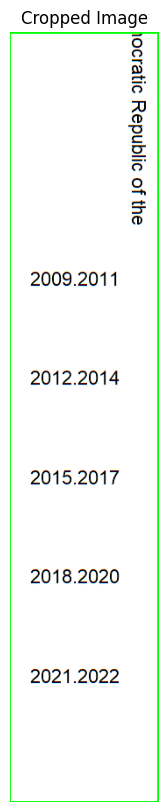

Extracted Text from Rotated ROI:
2009.2011

2012.2014

2015.2017

2018.2020

2021.2022

du} JO oI1Gndey oNe1001




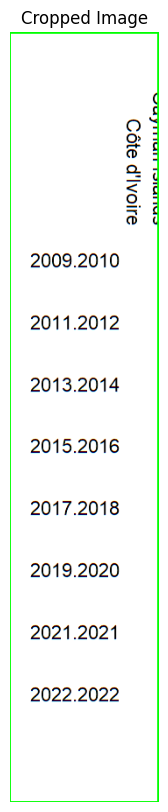

Extracted Text from Rotated ROI:
2009.2010

2011.2012

2013.2014

2015.2016

2017.2018

2019.2020

2021.2021

2022.2022

BIIOAL,P 8}9D

linn.

_




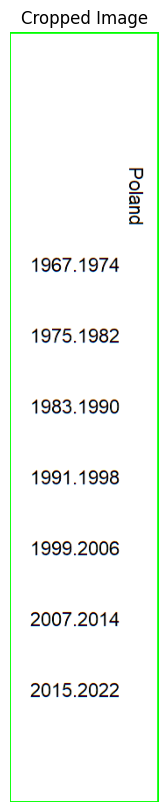

Extracted Text from Rotated ROI:
1967.1974

1975.1982

1983.1990

1991.1998

1999.2006

2007.2014

2015.2022

puelod




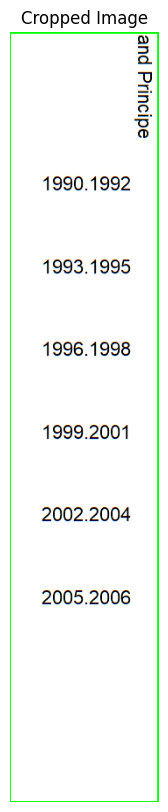

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2006

edloug pue




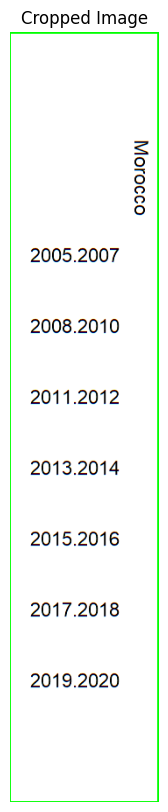

Extracted Text from Rotated ROI:
2005.2007

2008.2010

2011.2012

2013.2014

2015.2016

2017.2018

2019.2020

OIDO1O/\|




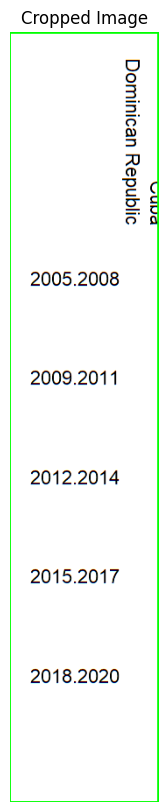

Extracted Text from Rotated ROI:
2005.2008

2009.2011

2012.2014

2015.2017

2018.2020

oyjqndey uesiuiwog

pan.




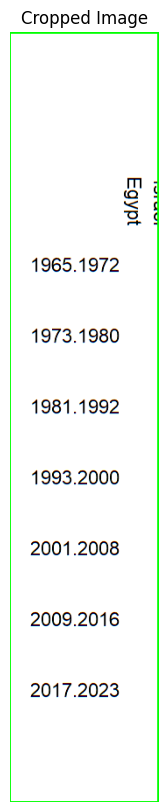

Extracted Text from Rotated ROI:
\dA63

1965.1972

1973.1980

1981.1992

1993.2000

2001.2008

2009.2016

2017.2023




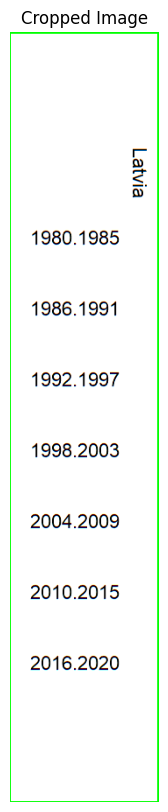

Extracted Text from Rotated ROI:
1980.1985

1986.1991

1992.1997

1998.2003

2004.2009

2010.2015

2016.2020

ele]




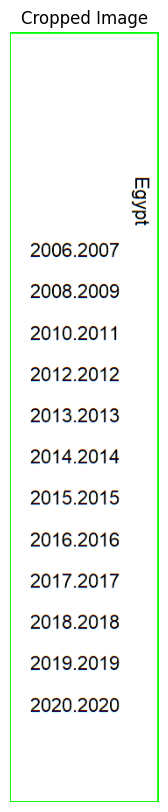

Extracted Text from Rotated ROI:
2006.2007
2008.2009
2010.2011
2012.2012
2013.2013
2014.2014
2015.2015
2016.2016
2017.2017
2018.2018
2019.2019

2020.2020

ydA65




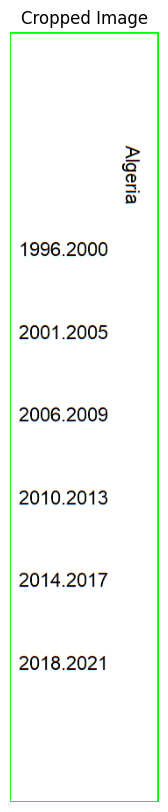

Extracted Text from Rotated ROI:
1996.2000

2001.2005

2006.2009

2010.2013

2014.2017

2018.2021

euebly




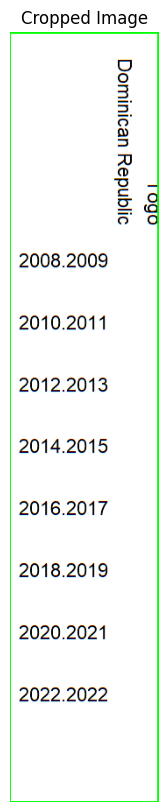

Extracted Text from Rotated ROI:
2008.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2019

2020.2021

2022.2022

oyjqndey uesiuiwog

o601




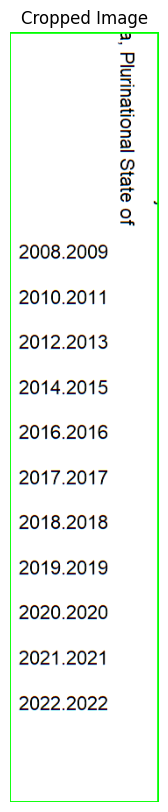

Extracted Text from Rotated ROI:
2008.2009

2010.2011

2012.2013

2014.2015

2016.2016

2017.2017

2018.2018

2019.2019

2020.2020

2021.2021

2022.2022

JO 9}e}S eUOHeULIN| ‘E




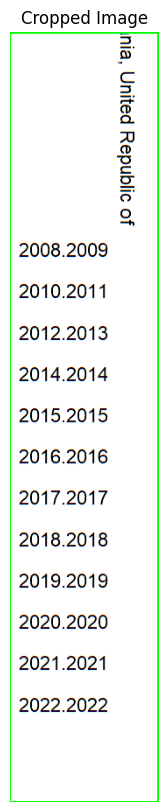

Extracted Text from Rotated ROI:
2008.2009
2010.2011
2012.2013
2014.2014
2015.2015
2016.2016
2017.2017
2018.2018
2019.2019
2020.2020
2021.2021

2022.2022

Jo agndey peyun ‘elu




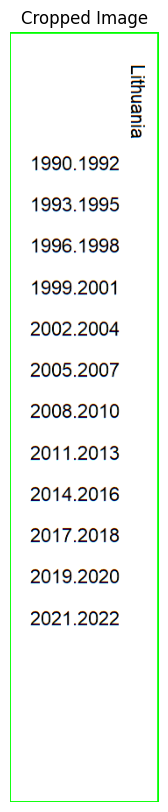

Extracted Text from Rotated ROI:
1990.1992
1993.1995
1996.1998
1999.2001
2002.2004
2005.2007
2008.2010
2011.2013
2014.2016
2017.2018
2019.2020

2021.2022

eluenuy!]




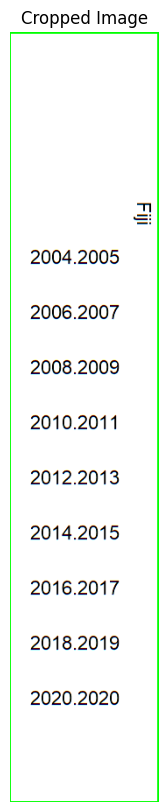

Extracted Text from Rotated ROI:
2004.2005

2006.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2019

2020.2020




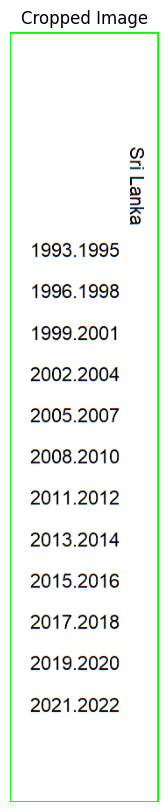

Extracted Text from Rotated ROI:
1993.1995
1996.1998
1999.2001
2002.2004
2005.2007
2008.2010
2011.2012
2013.2014
2015.2016
2017.2018
2019.2020

2021.2022

eyue] US




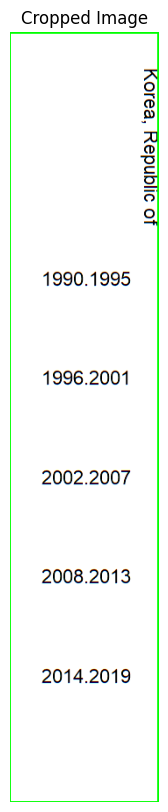

Extracted Text from Rotated ROI:
Jo aIjqnday ‘eaioy

1990.1995

1996.2001

2002.2007

2008.2013

2014.2019




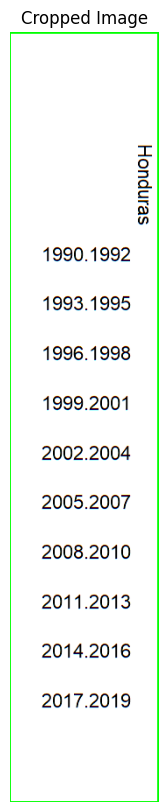

Extracted Text from Rotated ROI:
1990.1992

1993.1995

1996.1998

1999.2001

2002.2004

2005.2007

2008.2010

2011.2013

2014.2016

2017.2019

seunpuoH




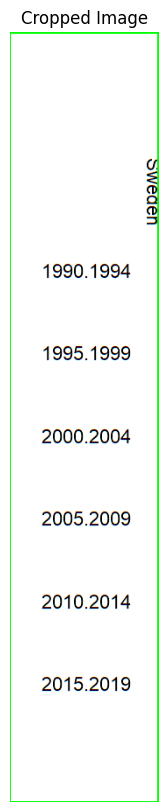

Extracted Text from Rotated ROI:
1990.1994

1995.1999

2000.2004

2005.2009

2010.2014

2015.2019

usD3aMa




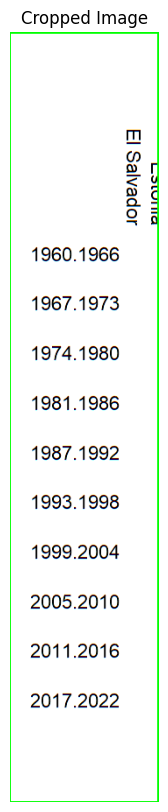

Extracted Text from Rotated ROI:
1960.1966

1967.1973

1974.1980

1981.1986

1987.1992

1993.1998

1999.2004

2005.2010

2011.2016

2017.2022

Jopeales |F
puimes




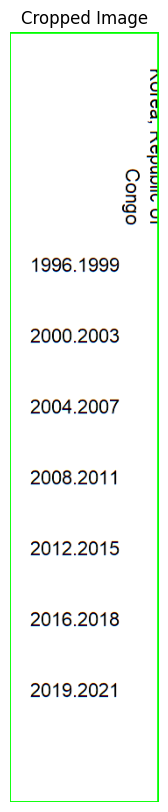

Extracted Text from Rotated ROI:
ofuoD
Ina

1996.1999

2000.2003

2004.2007

2008.2011

2012.2015

2016.2018

2019.2021

IAN




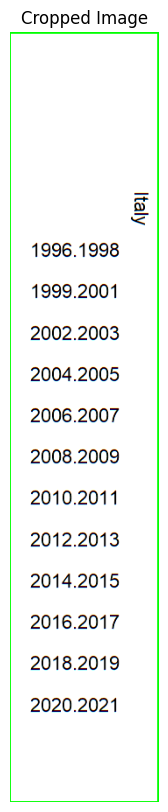

Extracted Text from Rotated ROI:
1996.1998
1999.2001
2002.2003
2004.2005
2006.2007
2008.2009
2010.2011
2012.2013
2014.2015
2016.2017
2018.2019

2020.2021

Ajey




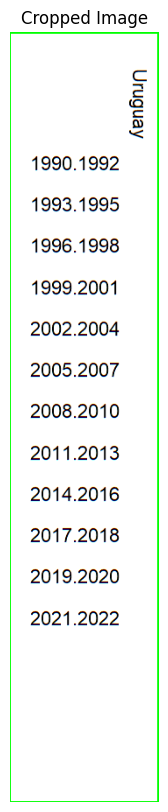

Extracted Text from Rotated ROI:
1990.1992
1993.1995
1996.1998
1999.2001

2002.2004
2005.2007
2008.2010
2011.2013
2014.2016
2017.2018
2019.2020
2021.2022

Aen6nin




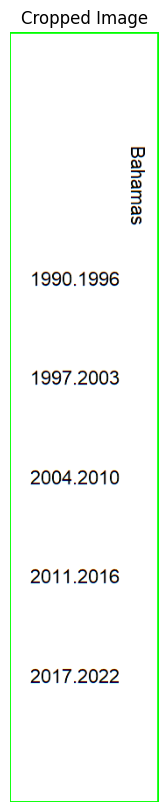

Extracted Text from Rotated ROI:
1990.1996

1997.2003

2004.2010

2011.2016

2017.2022

seweyeq




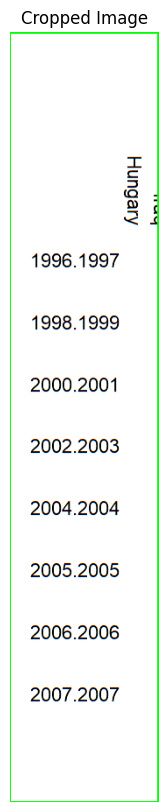

Extracted Text from Rotated ROI:
AseBuny

1996.1997

1998.1999

2000.2001

2002.2003

2004.2004

2005.2005

2006.2006

2007.2007




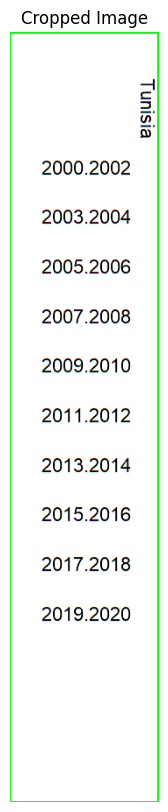

Extracted Text from Rotated ROI:
2000.2002

2003.2004

2005.2006

2007.2008

2009.2010

2011.2012

2013.2014

2015.2016

2017.2018

2019.2020

eisiun |




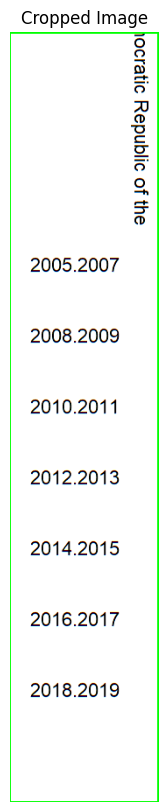

Extracted Text from Rotated ROI:
2005.2007

2008.2009

2010.2011

2012.2013

2014.2015

2016.2017

2018.2019

du} JO oI1Gndey oNe1001




In [15]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Load the image
input_dir = 'D:\\encoder-tool\\filtered-contours'

for filename in os.listdir(input_dir):
    if filename.endswith('.png'):  # Process only PNG files
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)

        # Define the region of interest (ROI)
        # (x, y, width, height)
        roi = (280, 870, 880, 170)

        # Draw a rectangle around the ROI on the original image
        x, y, w, h = roi
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the image to the ROI
        cropped_image = image[y:y+h, x:x+w]

        # Rotate the cropped image 90 degrees clockwise
        rotated_image = cv2.rotate(cropped_image, cv2.ROTATE_90_CLOCKWISE)

        # Display the cropped image using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
        plt.title("Cropped Image")
        plt.axis('off')  # Hide the axis
        plt.show()

        # Convert the rotated image to grayscale
        gray_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

        # Use Tesseract to extract text from the rotated region
        text = pytesseract.image_to_string(gray_rotated)

        print("Extracted Text from Rotated ROI:")
        print(text)